<a href="https://colab.research.google.com/github/jehyunlee/datastory/blob/main/2021/movie/movie_2_boxoffice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[데이터스토리] 데이터로 보는 개봉 영화 (2) 박스오피스**

# **0. 라이브러리 업그레이드 및 한글 사용 설정**

## **0.1. Matplotlib, seaborn, pandas**

In [1]:
# Step 1. Matplotlib 등 업그레이드
!pip install matplotlib -U
!pip install seaborn -U
!pip install pandas -U
!pip install openpyxl -U

# Step 2. 한글 설치 및 사용 설정
!sudo apt-get install -y fonts-nanum 
!sudo fc-cache -fv  
!rm ~/.cache/matplotlib -rf

# Step 3. 셀 실행 후 런타임 재시작

     |████████████████████████████████| 10.3 MB 5.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 11.3 MB 5.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.3 which is incompatible.


     |████████████████████████████████| 242 kB 5.2 MB/s 
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,032 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This fro

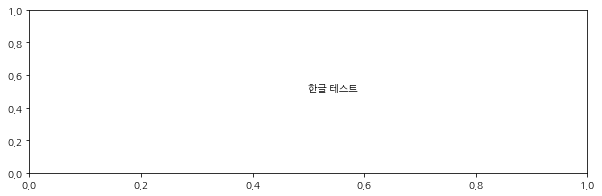

In [1]:
# Step 4. 한글 글꼴 설정
import matplotlib.pyplot as plt

plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 한글 설정 확인
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,3))
ax.text(0.5, 0.5, "한글 테스트")
plt.show()

# **1. 개발 환경 설정**

## **1.1. 기본 라이브러리**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import requests
from copy import deepcopy

sns.set_context("talk")
sns.set_style("whitegrid")

pd.options.display.max_columns=50

# seaborn 설정에 의해 파괴되는 한글 설정을 재설정
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# **2. 데이터 확보**

### **2.1. 국가별, 장르별 데이터**
* **데이터스토리 (1)에 사용한 데이터**

In [3]:
# 영화 목록
url_movielist = "https://jehyunlee.github.io/about/src/2021_datastory_movie/df_movielist.pkl"

# # 국가별 데이터
url_nations = "https://jehyunlee.github.io/about/src/2021_datastory_movie/df_nations.pkl"
url_nationsY = "https://jehyunlee.github.io/about/src/2021_datastory_movie/df_nationsY.pkl"

# # 장르별 데이터
url_genres = "https://jehyunlee.github.io/about/src/2021_datastory_movie/df_genres.pkl"
url_genresY = "https://jehyunlee.github.io/about/src/2021_datastory_movie/df_genresY.pkl"

# 데이터 불러오기
df_movielist = pd.read_pickle(url_movielist)
df_nations = pd.read_pickle(url_nations)
df_nationsY = pd.read_pickle(url_nationsY)
df_genres = pd.read_pickle(url_genres)
df_genresY = pd.read_pickle(url_genresY)

## **2.2. 역대 박스오피스 데이터**

In [4]:
# 박스오피스 데이터: KOBIS 데이터를 받아 header 일부 수정
url_bo = "https://jehyunlee.github.io/about/src/2021_datastory_movie/KOBIS_boxoffice.xlsx"

# 데이터 불러오기
df_bo = pd.read_excel(url_bo, engine="openpyxl")
df_bo.head(3)

,순번,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
0,1,명량,김한민,(주)빅스톤픽쳐스,NaN,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,1587,1.357484e+11,17613682,3.312123e+10,4163666,사극,15세이상관람가,일반영화
1,2,극한직업,이병헌,"(주)어바웃필름,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,1978,1.396480e+11,16264944,3.185866e+10,3638287,코미디,15세이상관람가,일반영화
2,3,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",NaN,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,개봉영화,장편,한국,1912,1.156987e+11,14410754,2.753083e+10,3346172,판타지,12세이상관람가,일반영화


In [5]:
# 결측치 제거
df_bo = df_bo.loc[df_bo["개봉일"] != 'NaT']
df_bo["개봉일"] = df_bo["개봉일"].astype(str)
df_bo["openYear"] = df_bo["개봉일"].apply(lambda x: x.split("-")[0])
df_bo = df_bo.loc[df_bo["openYear"] != 'NaT']
df_bo["openYear"] = df_bo["openYear"].astype(int)

In [6]:
# 박스오피스 데이터 저장
!mkdir data
df_bo.to_pickle("./data/df_bo.pkl")

In [7]:
# 1971-2020년 데이터 선별
df_bo = df_bo.query("1971 <= openYear <= 2020")
print(df_bo.shape)

(23379, 19)


### **2.2.1. 장르 매칭**

In [8]:
# 영화목록 데이터
df_movie_bo = df_movielist[["movieCd", "movieNm", "openDt", "repNationNm"]]
df_movie_bo["movieNm"] = df_movie_bo["movieNm"].apply(lambda x: x.replace(" ", ""))
df_movie_bo["openDt"] = df_movie_bo["openDt"].astype(str)
df_movie_bo["openDt"] = df_movie_bo["openDt"].apply(lambda x: f"{x[:4]}-{x[4:6]}-{x[6:]}")
df_movie_bo["영화명_개봉일_대표국적"] = df_movie_bo[["movieNm", "openDt", "repNationNm"]].apply(lambda x: f"{x[0]}_{x[1]}_{x[2]}", axis=1)

df_movie_bo.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,movieCd,movieNm,openDt,repNationNm,영화명_개봉일_대표국적
10,20139221,그래비티,2013-10-17,미국,그래비티_2013-10-17_미국
23,20201002,조제,2020-12-10,한국,조제_2020-12-10_한국
27,20010264,아멜리에,2001-10-19,프랑스,아멜리에_2001-10-19_프랑스


In [9]:
# 박스오피스 데이터
df_bo_genres = deepcopy(df_bo)

# 영화명 띄어쓰기 제거
df_bo_genres["영화명"] = df_bo_genres["영화명"].str.replace(' ', '')

# 장르 결합 key
df_bo_genres["영화명_개봉일_대표국적"] = df_bo_genres[["영화명", "개봉일", "국적"]].apply(lambda x: f"{x[0]}_{x[1]}_{x[2]}", axis=1)
df_bo_genres.head(3)

,순번,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분,openYear,영화명_개봉일_대표국적
0,1,명량,김한민,(주)빅스톤픽쳐스,NaN,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,1587,1.357484e+11,17613682,3.312123e+10,4163666,사극,15세이상관람가,일반영화,2014,명량_2014-07-30_한국
1,2,극한직업,이병헌,"(주)어바웃필름,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,1978,1.396480e+11,16264944,3.185866e+10,3638287,코미디,15세이상관람가,일반영화,2019,극한직업_2019-01-23_한국
2,3,신과함께-죄와벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",NaN,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,개봉영화,장편,한국,1912,1.156987e+11,14410754,2.753083e+10,3346172,판타지,12세이상관람가,일반영화,2017,신과함께-죄와벌_2017-12-20_한국


In [10]:
# 데이터 병합 전 Key 확인
list(set(df_movie_bo["영화명_개봉일_대표국적"]) - set(df_bo_genres["영화명_개봉일_대표국적"]))

['스네이크앤이어링_2011-12-01_일본',
 '에곤쉴레:욕망이그린그림_2016-12-22_오스트리아 ',
 '데쓰위시3_1988-02-18_미국',
 '미스터본즈_2004-08-06_남아프리카공화국',
 '립이어:자학의성_2017-09-28_프랑스',
 '세인트_2012-05-10_네덜란드',
 '사우스스트리트의소매치기_2005-07-07_미국',
 '바스키아_1998-09-18_미국',
 '잉카_2000-10-28_미국',
 '사랑의여왕_2012-04-12_프랑스',
 '레더쟈켓_1993-02-06_미국',
 '개인교수2012_2012-04-05_벨기에',
 '기브잇올_2004-10-14_일본',
 '파라노이드_2006-02-28_영국',
 '신경쇠약직전의뱀파이어_2015-05-21_오스트리아 ',
 '해저탐험대마린X_1983-02-19_한국',
 '데미지_1994-12-17_영국',
 '1987_2017-12-27_한국',
 '세상밖으로_2007-02-01_일본',
 '이상한나라의앨리스_2018-05-02_영국',
 '몰:데이투킬_2015-09-10_미국',
 '새벽에서밤까지_1990-01-01_한국',
 '2010빅뱅라이브콘서트BIGSHOW3D_2011-02-02_한국',
 '방콕데인져러스_2001-09-22_태국',
 '치킨_1996-12-07_오스트리아 ',
 '황비홍의서역웅사_1997-02-22_홍콩',
 '태권소년어니와마스타김_1989-12-22_한국',
 '태양유이_2000-07-08_홍콩',
 '불의전차_2016-06-16_영국',
 '더벙커:프로젝트12_2017-09-28_스페인',
 '9/11_2018-01-31_미국',
 '일트로바토레_2016-08-09_프랑스',
 '마이퍼스트미스터_2004-12-10_미국',
 '토미에-리버스_2005-09-02_일본',
 '블러드오렌지_2018-10-31_영국',
 '화녀_1971-04-01_한국',
 '맥베스_2018-10-03_영국',
 '1917_2020-02-19_미국',
 '경복궁123

In [11]:
# 박스오피스 확인: 천녀유혼
df_bo.loc[df_bo["영화명"]=="천녀유혼"]

,순번,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분,openYear
2741,2742,천녀유혼,엽위신,NaN,NaN,씨너스엔터테인먼트(주),2011-05-12,개봉영화,장편,중국,240,497089500.0,66219,161673000.0,20447,SF,12세이상관람가,일반영화,2011
21728,21729,천녀유혼,정소동,(주)동아수출공사,NaN,NaN,1987-12-05,개봉영화,장편,홍콩,0,0.0,0,0.0,31639,공포(호러),중학생이상관람가,일반영화,1987


In [12]:
# 영화목록 확인: 천녀유혼
df_movielist.loc[df_movielist["movieNm"]=="천녀유혼"]

,movieCd,movieNm,movieNmEn,prdtYear,openDt,typeNm,prdtStatNm,nationAlt,genreAlt,repNationNm,repGenreNm,directors,companys,openYear
13048,20080605,천녀유혼,A Chinese Ghost Story,1987,19871205,장편,개봉,홍콩,"공포(호러),드라마,판타지",홍콩,공포(호러),[{'peopleNm': '정소동'}],"[{'companyCd': '20103093', 'companyNm': '(주)동아...",1987
13946,20110311,천녀유혼,A Chinese Fairy Tale,2010,20110512,장편,개봉,중국,"SF,판타지,멜로/로맨스",중국,SF,[{'peopleNm': '엽위신'}],[],2011
19873,20124708,천녀유혼,A Chinese Ghost Story: The Tsui Hark Animation,1997,19980101,장편,개봉,"홍콩,일본","애니메이션,액션,판타지,코미디,멜로/로맨스",홍콩,애니메이션,[{'peopleNm': '진준문'}],[],1998


In [13]:
# 박스오피스 확인: 품행제로
df_bo.loc[df_bo["영화명"]=="품행제로"]

,순번,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분,openYear
524,525,품행제로,조근식,케이엠컬쳐㈜,NaN,영화사청어람(주),2002-12-26,개봉영화,장편,한국,0,0.0,1694637,0.0,569421,코미디,15세관람가,일반영화,2002


In [14]:
# 영화목록 확인: 품행제로
df_movielist.loc[df_movielist["movieNm"]=="품행제로"]

,movieCd,movieNm,movieNmEn,prdtYear,openDt,typeNm,prdtStatNm,nationAlt,genreAlt,repNationNm,repGenreNm,directors,companys,openYear
12273,20020239,품행제로,Conduct Zero,2002,20021226,장편,개봉,한국,코미디,한국,코미디,[{'peopleNm': '조근식'}],"[{'companyCd': '20100158', 'companyNm': '케이엠컬쳐...",2002
14267,20112810,품행제로,Zero de conduite,1933,20040327,장편,개봉,프랑스,다큐멘터리,프랑스,다큐멘터리,[{'peopleNm': '장 비고'}],"[{'companyCd': '20111945', 'companyNm': '프란필름디...",2004


In [15]:
df_bo_genres = df_movie_bo.merge(df_bo_genres[["영화명_개봉일_대표국적", "영화명", "개봉일", "서울 관객수", "전국 관객수", "국적", "openYear"]])
df_bo_genres = df_bo_genres.merge(df_genres.drop(["movieNm", "openYear"], axis=1), on="movieCd")
df_bo_genres = df_bo_genres.drop(["movieNm", "openDt", "repNationNm", "영화명_개봉일_대표국적"], axis=1)
print(df_bo_genres.shape)
df_bo_genres.head(3)

(23281, 29)


,movieCd,영화명,개봉일,서울 관객수,전국 관객수,국적,openYear,G_SF,G_가족,G_공연,G_공포,G_기타,G_다큐멘터리,G_드라마,G_멜로/로맨스,G_뮤지컬,G_미스터리,G_범죄,G_사극,G_서부극,G_성인물,G_스릴러,G_애니메이션,G_액션,G_어드벤처,G_전쟁,G_코미디,G_판타지,복합장르
0,20139221,그래비티,2013-10-17,1311034,3227452,미국,2013,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,20201002,조제,2020-12-10,45870,186647,한국,2020,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,20010264,아멜리에,2001-10-19,157562,0,프랑스,2001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


In [16]:
df_bo.shape

(23379, 19)

In [17]:
df_bo_genres.shape

(23281, 29)

In [18]:
# 영화 장르, 관객 확인: 천녀유혼
df_bo_genres.loc[df_bo_genres["영화명"]=="천녀유혼"]

,movieCd,영화명,개봉일,서울 관객수,전국 관객수,국적,openYear,G_SF,G_가족,G_공연,G_공포,G_기타,G_다큐멘터리,G_드라마,G_멜로/로맨스,G_뮤지컬,G_미스터리,G_범죄,G_사극,G_서부극,G_성인물,G_스릴러,G_애니메이션,G_액션,G_어드벤처,G_전쟁,G_코미디,G_판타지,복합장르
11580,20080605,천녀유혼,1987-12-05,31639,0,홍콩,1987,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
12446,20110311,천녀유혼,2011-05-12,20447,66219,중국,2011,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [19]:
# 영화 장르, 관객 확인: 품행제로
df_bo_genres.loc[df_bo_genres["영화명"]=="품행제로"]

,movieCd,영화명,개봉일,서울 관객수,전국 관객수,국적,openYear,G_SF,G_가족,G_공연,G_공포,G_기타,G_다큐멘터리,G_드라마,G_멜로/로맨스,G_뮤지컬,G_미스터리,G_범죄,G_사극,G_서부극,G_성인물,G_스릴러,G_애니메이션,G_액션,G_어드벤처,G_전쟁,G_코미디,G_판타지,복합장르
10818,20020239,품행제로,2002-12-26,569421,1694637,한국,2002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [20]:
# 데이터 백업
df_bo_genres.to_pickle("./data/df_bo_genres.pkl")

### **2.2.2. 년도별 데이터 정리**

In [21]:
# 년도별 데이터 정리
df_boY = df_bo[["openYear", "전국 관객수", "서울 관객수"]].groupby("openYear").sum().reset_index()
df_boY.head()

# 한국영화, 해외영화
df_bo_kr = df_bo.query("국적 == '한국'")
df_boY_kr = df_bo_kr[["openYear", "전국 관객수", "서울 관객수"]].groupby("openYear").sum().reset_index()

df_bo_nkr = df_bo.query("국적 != '한국'")
df_boY_nkr = df_bo_nkr[["openYear", "전국 관객수", "서울 관객수"]].groupby("openYear").sum().reset_index()

In [22]:
df_boY_kr.head()

,openYear,전국 관객수,서울 관객수
0,1971,0,3913867
1,1972,0,2845083
2,1973,0,1856398
3,1974,0,2695969
4,1975,0,2129130


In [23]:
df_boY_nkr.head()

,openYear,전국 관객수,서울 관객수
0,1971,0,7589223
1,1972,0,7893193
2,1973,0,6471786
3,1974,0,5970750
4,1975,0,4274980


In [24]:
# 데이터 백업
df_bo_kr.to_pickle("./data/df_bo_kr.pkl")
df_boY_kr.to_pickle("./data/df_boY_kr.pkl")
df_bo_nkr.to_pickle("./data/df_bo_nkr.pkl")
df_boY_nkr.to_pickle("./data/df_boY_nkr.pkl")

#### **기초분석**

<AxesSubplot:xlabel='openYear', ylabel='Count'>

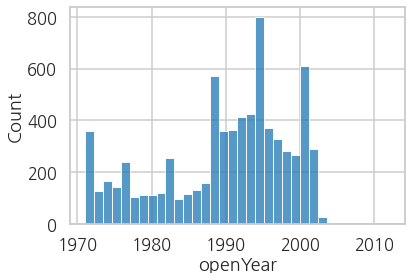

In [25]:
# 전국 관객 수 없는 영화 확인
sns.histplot(df_bo.loc[df_bo["전국 관객수"]==0, "openYear"])

(0.0, 10.0)

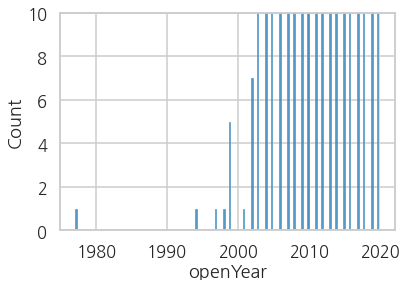

In [26]:
# 전국 관객 수 있는 영화 확인
ax = sns.histplot(df_bo.loc[df_bo["전국 관객수"]!=0, "openYear"])
ax.set_ylim(0, 10)

<AxesSubplot:xlabel='openYear', ylabel='Count'>

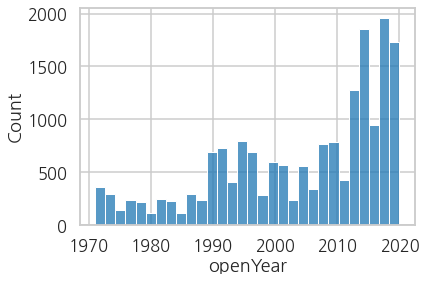

In [27]:
# 서울 관객 수 있는 영화 확인
sns.histplot(df_bo.loc[df_bo["서울 관객수"]!=0, "openYear"])

<AxesSubplot:xlabel='openYear', ylabel='Count'>

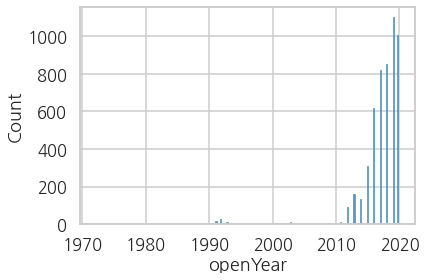

In [28]:
# 서울 관객 수 없는 영화 확인
sns.histplot(df_bo.loc[df_bo["서울 관객수"]==0, "openYear"])

5279


<AxesSubplot:xlabel='전국 관객수', ylabel='Count'>

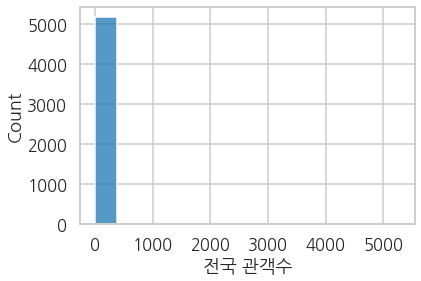

In [29]:
# 서울 관객 수 없는 영화의 전국 관객 수
print(df_bo.loc[df_bo["서울 관객수"]==0, "전국 관객수"].max())
sns.histplot(df_bo.loc[df_bo["서울 관객수"]==0, "전국 관객수"])

In [30]:
df_bo.loc[df_bo["서울 관객수"]==0].sort_values("전국 관객수", ascending=False).head(10)

,순번,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분,openYear
5116,5117,테레사 팔머의 감금,데이비드 데닌,NaN,(주)컴퍼니엘,(주)컴퍼니엘,2013-11-28,개봉영화,장편,호주,4,31659000.0,5279,0.0,0,스릴러,청소년관람불가,독립/예술영화,2013
5226,5227,서스펙트 제로,E. 엘리아스 메리지,파라마운트 픽쳐스,소니픽쳐스릴리징코리아,소니픽쳐스릴리징코리아,2005-03-17,개봉영화,장편,미국,0,0.0,4933,0.0,0,공포(호러),15세관람가,일반영화,2005
5331,5332,제노바,마이클 윈터바텀,레볼루션 필름,㈜영화사 백두대간,㈜영화사 백두대간,2009-11-19,개봉영화,장편,영국,1,33567015.0,4450,0.0,0,드라마,15세이상관람가,독립/예술영화,2009
5583,5584,핀두스 이야기,알리 사마디 아하디,NaN,(주)영화사 안다미로,(주)레인메이커필름,2017-11-30,개봉영화,장편,독일,22,17345000.0,3524,0.0,0,애니메이션,전체관람가,독립/예술영화,2017
5861,5862,릴라와 마법의 책,마르셀라 링콘 곤잘레스,NaN,씨네힐,(주)영화사오원,2018-11-08,개봉영화,장편,콜롬비아,24,14141000.0,2698,0.0,0,어드벤처,전체관람가,독립/예술영화,2018
6165,6166,파이어 위드 파이어,데이빗 바렛,NaN,(주)소나무픽쳐스,(주)영화사폴,2013-02-21,개봉영화,장편,미국,1,4355000.0,2030,0.0,0,액션,청소년관람불가,일반영화,2013
6379,6380,사대명포 2,진가상,NaN,(주)디앤아이컴퍼니,(주)디앤아이컴퍼니,2014-01-16,개봉영화,장편,홍콩,5,7590000.0,1700,0.0,0,액션,15세이상관람가,일반영화,2014
6411,6412,셀러브리티 섹스테이프,스콧 휠러,NaN,(주)스넵쏘울,(주)스넵쏘울,2013-06-27,개봉영화,장편,미국,2,3487000.0,1664,0.0,0,코미디,청소년관람불가,일반영화,2013
6421,6422,친구의 아내를 탐하다,얀 흐레베이크,NaN,(주)소나무픽쳐스,(주)소나무픽쳐스,2013-05-31,개봉영화,장편,체코,1,3501000.0,1653,0.0,0,코미디,청소년관람불가,독립/예술영화,2013
6431,6432,아웃포스트 : 블랙선,스티브 바커,NaN,(주)소나무픽쳐스,(주)소나무픽쳐스,2013-06-20,개봉영화,장편,영국,1,3495000.0,1650,0.0,0,스릴러,15세이상관람가,독립/예술영화,2013


In [31]:
# 서울 관객 수 없는 영화 목록
df_bo.loc[df_bo["서울 관객수"] == 0]

,순번,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분,openYear
5116,5117,테레사 팔머의 감금,데이비드 데닌,NaN,(주)컴퍼니엘,(주)컴퍼니엘,2013-11-28,개봉영화,장편,호주,4,31659000.0,5279,0.0,0,스릴러,청소년관람불가,독립/예술영화,2013
5226,5227,서스펙트 제로,E. 엘리아스 메리지,파라마운트 픽쳐스,소니픽쳐스릴리징코리아,소니픽쳐스릴리징코리아,2005-03-17,개봉영화,장편,미국,0,0.0,4933,0.0,0,공포(호러),15세관람가,일반영화,2005
5331,5332,제노바,마이클 윈터바텀,레볼루션 필름,㈜영화사 백두대간,㈜영화사 백두대간,2009-11-19,개봉영화,장편,영국,1,33567015.0,4450,0.0,0,드라마,15세이상관람가,독립/예술영화,2009
5583,5584,핀두스 이야기,알리 사마디 아하디,NaN,(주)영화사 안다미로,(주)레인메이커필름,2017-11-30,개봉영화,장편,독일,22,17345000.0,3524,0.0,0,애니메이션,전체관람가,독립/예술영화,2017
5861,5862,릴라와 마법의 책,마르셀라 링콘 곤잘레스,NaN,씨네힐,(주)영화사오원,2018-11-08,개봉영화,장편,콜롬비아,24,14141000.0,2698,0.0,0,어드벤처,전체관람가,독립/예술영화,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22913,22914,헤드 오버 힐스,마크 워터스,NaN,NaN,NaN,2003-09-26,개봉영화,장편,미국,0,0.0,0,0.0,0,멜로/로맨스,18세관람가,일반영화,2003
22936,22937,현대 고혹자,후영재,NaN,(주)영상시대,NaN,1996-04-20,개봉영화,장편,홍콩,0,0.0,0,0.0,0,액션,연소자관람불가,일반영화,1996
22944,22945,혈락제,NaN,NaN,NaN,NaN,1992-10-24,개봉영화,장편,홍콩,0,0.0,0,0.0,0,NaN,중학생이상관람가,일반영화,1992
23045,23046,화엄경,장선우,태흥영화(주),NaN,NaN,1993-06-26,개봉영화,장편,한국,0,0.0,0,0.0,0,드라마,연소자관람불가,일반영화,1993


In [32]:
# 서울 관객 수가 0인 작품은 지방에서만 개봉한 작품으로 간주. 정상 데이터 처리.

## **2.3. 월별 박스오피스 데이터(2018-2020)**

In [33]:
# 박스오피스 데이터: KOBIS 데이터를 받아 header 일부 수정
url_boM_2018 = "https://jehyunlee.github.io/about/src/2021_datastory_movie/KOBIS_movie_2018.xlsx"

# 데이터 불러오기
df_boM_2018 = pd.read_excel(url_boM_2018, engine="openpyxl")

In [34]:
# 박스오피스 데이터: KOBIS 데이터를 받아 header 일부 수정
url_boM_2019 = "https://jehyunlee.github.io/about/src/2021_datastory_movie/KOBIS_movie_2019.xlsx"

# 데이터 불러오기
df_boM_2019 = pd.read_excel(url_boM_2019, engine="openpyxl")

In [35]:
# 박스오피스 데이터: KOBIS 데이터를 받아 header 일부 수정
url_boM_2020 = "https://jehyunlee.github.io/about/src/2021_datastory_movie/KOBIS_movie_2020.xlsx"

# 데이터 불러오기
df_boM_2020 = pd.read_excel(url_boM_2020, engine="openpyxl")

In [36]:
df_boM = pd.concat([df_boM_2018, df_boM_2019, df_boM_2020], axis=0)
# 년월 컬럼 생성
df_boM["YearMonth"] = df_boM["년월"].dt.strftime("%Y. %m.")

print(df_boM.shape)
df_boM.head()

(36, 16)


,년월,한국 개봉편수,한국 상영편수,한국 매출액,한국 관객수,한국 점유율,외국 개봉편수,외국 상영편수,외국 매출액,외국 관객수,외국 점유율,전체 개봉편수,전체 상영편수,전체 매출액,전체 관객수,YearMonth
0,2018-01-01,65,129,112741611565,14061620,0.613,94,264,70356350290,8881836,0.387,159,393,183097961855,22943456,2018. 01.
1,2018-02-01,36,121,56020721704,6989199,0.449,89,269,70393244100,8562561,0.551,125,390,126413965804,15551760,2018. 02.
2,2018-03-01,62,165,63213457740,7916144,0.618,92,294,40499257340,4885367,0.382,154,459,103712715080,12801511,2018. 03.
3,2018-04-01,56,154,38011778590,4690560,0.333,90,283,81723369503,9375683,0.667,146,437,119735148093,14066243,2018. 04.
4,2018-05-01,53,153,42903891874,5094177,0.321,91,293,95910974486,10797538,0.679,144,446,138814866360,15891715,2018. 05.


#### **기초분석**

In [37]:
# 한국 점유율, 외국 점유율 계산식? : 점유율/전체 점유율
(df_boM["한국 관객수"]/df_boM["전체 관객수"])[:5]

0    0.612882
1    0.449415
2    0.618376
3    0.333462
4    0.320556
dtype: float64

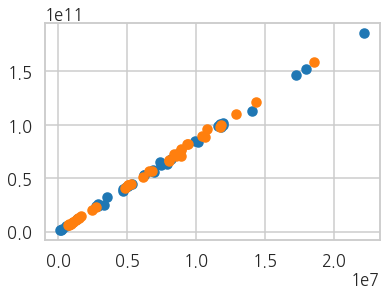

In [38]:
# 매출액 vs 관객수

plt.scatter(df_boM["한국 관객수"], df_boM["한국 매출액"])
plt.scatter(df_boM["외국 관객수"], df_boM["외국 매출액"])

In [39]:
# 한국영화 관객 1인당 매출: 8366원
(df_boM["한국 매출액"]/df_boM["한국 관객수"]).mean()

8365.519913706084

In [40]:
# 해외영화 관객 1인당 매출: 8429원
(df_boM["외국 매출액"]/df_boM["외국 관객수"]).mean()

8429.49551280481

# **3. 데이터 시각화**

In [41]:
# 이미지 저장 폴더
!mkdir images

## **3.1. 색상 설정**

In [42]:
# 국가별 색상코드
c_kr = "darkblue"       # 한국
c_etc = "0.7"           # 기타, 해외
c_it = "g"              # 이탈리아
c_cn = "darkred"        # 중국
c_fr = "gold"           # 프랑스
c_hk = "orangered"      # 홍콩
c_gb = "orchid"         # 영국
c_jp = "thistle"        # 일본
c_us = "mediumpurple"   # 미국

# 국가별 색상
N_colors = dict(zip(["한국", "기타", "해외", "미국", "일본", "홍콩", "프랑스"], 
                    [c_kr, c_etc, c_etc, c_us, c_jp, c_hk, c_fr]))

In [43]:
# 장르별 색상코드
cmap = plt.get_cmap("tab20")

c_drama = cmap(0/20)
c_romance = cmap(1/20)
c_action = cmap(2/20)
c_comedy = cmap(3/20)
c_thriller = cmap(12/20)
c_ero = cmap(13/20)
c_horror = cmap(6/20)
c_crime = cmap(7/20)
c_ani = cmap(8/20)
c_adv = cmap(9/20)
c_sf = cmap(10/20)
c_fantasy = cmap(11/20)
c_mistery = cmap(4/20)
c_docu = cmap(5/20)
c_family = cmap(14/20)
c_history = cmap(15/20)
c_war = cmap(16/20)
c_play = cmap(17/20)
c_musical = cmap(18/20)
c_western = cmap(19/20)

c_genres = [c_drama, c_romance, c_action, c_comedy, c_thriller, c_ero, c_horror, c_crime, c_ani, c_adv, c_sf, c_fantasy, c_mistery, c_docu, c_family, c_history, c_war, c_play, c_musical, c_western, c_etc]

# 장르 목록
genres_order = ['드라마', '멜로/로맨스', '액션', '코미디', '스릴러', '성인물', '공포', '범죄', '애니메이션',
                '어드벤처', 'SF', '판타지', '미스터리', '다큐멘터리', '가족', '사극', '전쟁', '공연', '뮤지컬', '서부극', '기타']

# 장르별 색상
G_colors = dict(zip([f"G_{g}" for g in genres_order], c_genres))

## **3.2. 서울/전국 관객 동원**

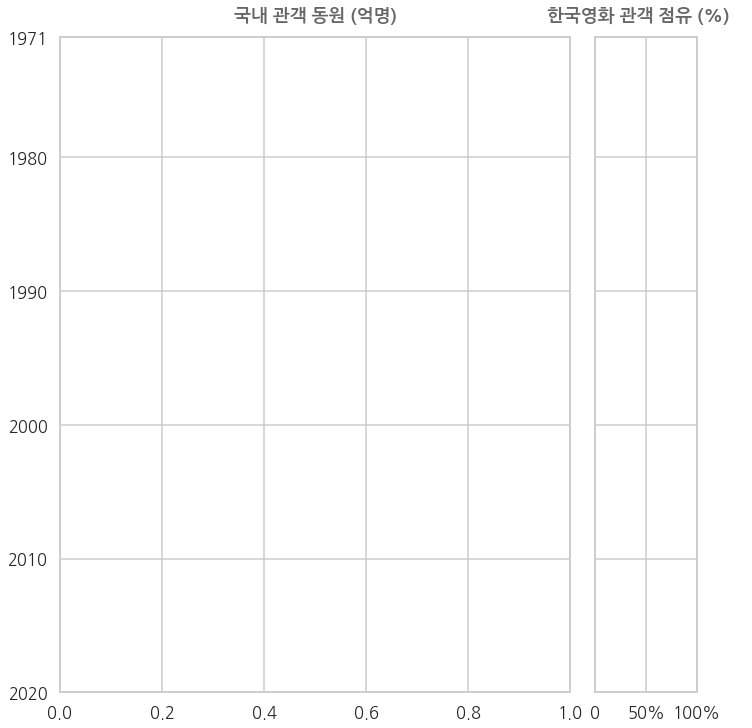

In [44]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 10), gridspec_kw={"width_ratios": [5, 1]}, constrained_layout=True, sharey=True)

font_title = {"fontweight":"bold", "color":"0.4"}

axs[0].set_title("국내 관객 동원 (억명)", fontdict=font_title, pad=16)
axs[1].set_title("한국영화 관객 점유 (%)   ", fontdict=font_title, pad=16)
portion_aspect0 = axs[0].get_position().height/axs[0].get_position().width
portion_aspect1 = axs[1].get_position().height/axs[1].get_position().width

yticks = [1971, 1980, 1990, 2000, 2010, 2020]
axs[0].set_ylim(2020, 1971)
axs[0].set_yticks(yticks)
axs[0].set_yticklabels(yticks)

for ax in axs[1:]:
    ax.set_xticks([0, 0.5, 1])
    ax.set_xticklabels([0, "50%", "100%"])

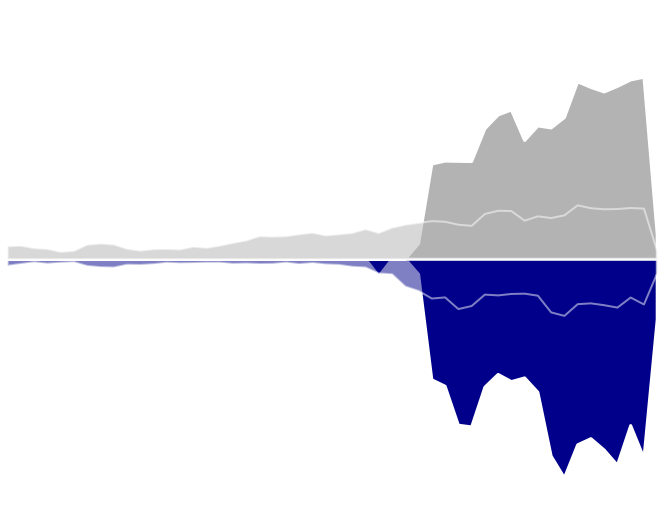

In [45]:
fig_p0, ax_p0 = plt.subplots(figsize=(axs[0].get_position().height * 10, axs[0].get_position().width * 10), constrained_layout=True)

ax_p0.fill_between(df_boY_kr["openYear"], -df_boY_kr["전국 관객수"]/1e8, 0, label="한국영화 전국 관객수", fc=c_kr, lw=3)
ax_p0.fill_between(df_boY_kr["openYear"], -df_boY_kr["서울 관객수"]/1e8, 0, label="한국영화 서울 관객수", fc=c_kr, lw=2, alpha=0.5)

ax_p0.fill_between(df_boY_nkr["openYear"], df_boY_nkr["전국 관객수"]/1e8, 0, label="해외영화 전국 관객수", fc=c_etc, lw=3)
ax_p0.fill_between(df_boY_nkr["openYear"], df_boY_nkr["서울 관객수"]/1e8, 0, label="해외영화 서울 관객수", fc=c_etc, lw=2, alpha=0.5)

ax_p0.grid(False)
ax_p0.set_xlim(1971, 2020)
ax_p0.set_ylim(-1.5, 1.5)
yticks = np.linspace(-1.5, 1.5, 7)
ax_p0.set_yticks(yticks)
ax_p0.set_yticklabels([abs(y) for y in yticks])

ax_p0.axis(False)
fig_p0.savefig("./images/bo_year0.png", dpi=200)

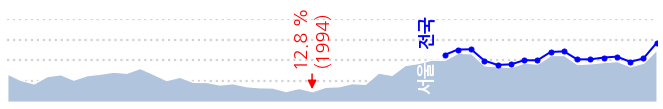

In [46]:
fig_p1, ax_p1 = plt.subplots(figsize=(axs[1].get_position().height * 10, axs[1].get_position().width * 10), constrained_layout=True)

ax_p1.fill_between(df_boY_kr["openYear"],
                   df_boY_kr["서울 관객수"]/df_boY["서울 관객수"] * 100, 0,
                  fc="lightsteelblue")
ax_p1.plot(df_boY_kr.query("openYear >= 2004")["openYear"],
           df_boY_kr.query("openYear >= 2004")["전국 관객수"]/df_boY.query("openYear >= 2004")["전국 관객수"] * 100,
           marker="o", ms=5, c="b", alpha=1, lw=2)

for y in [25, 50, 75, 100]:
    ax_p1.axhline(y, c="lightgray", zorder=-1, ls=":")

p_min = (df_boY_kr["서울 관객수"]/df_boY["서울 관객수"]).min()*100
p_argmin = (df_boY_kr["서울 관객수"]/df_boY["서울 관객수"]).argmin()
ax_p1.annotate(f"{p_min:.1f} %\n({1971+p_argmin})", 
               xy=(1971 + p_argmin, p_min), xytext=(1971 + p_argmin, p_min+30), c="r",
               arrowprops={"arrowstyle":'-|>', "ec":"r", "fc":"r"}, rotation=90, ha="center"
              )

ax_p1.text(2002, 15, "서울", c="w", fontweight="bold", rotation=90, ha="left")
ax_p1.text(2002, 70, "전국", c="b", fontweight="bold", rotation=90, ha="left")

ax_p1.set_xlim(1971, 2020)
ax_p1.set_ylim(0, 100)
ax_p1.axis(False)

fig_p1.savefig("./images/bo_year1.png", dpi=200)

In [47]:
# 역사적 사건들 
def plot_history(year, text, text_x_shift=50, text_y=None, text_c="green", text_size="x-small", text_fc="w", text_align="center",
                 c_h0 = "limegreen", c_h1 = "palegreen", alpha_h1=0.7, ax=axs):
    if not text_y:
        text_y = year-0.5
    
    y_line = [year] * 100
    
    if np.array(axs == None).any():
        ax = plt.gca()
        x0_line = np.linspace(ax.get_xbound()[1], ax.get_xbound()[0], 100)
        x1_line = 0
        ax_0 = ax
    elif isinstance(ax, np.ndarray):
        x0_line = np.linspace(axs[0].get_xbound()[1], axs[0].get_xbound()[0], 100)
        x1_line = np.linspace(axs[1].get_xbound()[1], axs[1].get_xbound()[0], 100)
        ax_0 = ax[0]
    else:
        x0_line = np.linspace(axs[0].get_xbound()[1], axs[0].get_xbound()[0], 100)
        x1_line = 0
        ax_0 = ax
    
    # axs[0]
    for i in range(99):
        ax_0.plot(x0_line[i:i+2], y_line[i:i+2], c=c_h0,
                    solid_capstyle='butt', alpha=np.power(np.sin(i/100),6)*2, zorder=15)
    ax_0.text(ax_0.get_xbound()[0]+text_x_shift, text_y, text, c=text_c, fontsize=text_size, 
              multialignment=text_align, ha="left",
              bbox={"boxstyle":"square", "pad":0.4, "facecolor":text_fc, "edgecolor":"none", "linewidth":1})  
    
    # axs[1:]
    if isinstance(x1_line, np.ndarray):
        for ax_ in ax[1:]:
            for i in range(99):
                ax_.plot(x1_line[i:i+2], y_line[i:i+2], c=c_h1,
                         solid_capstyle='butt', alpha=alpha_h1, zorder=15)

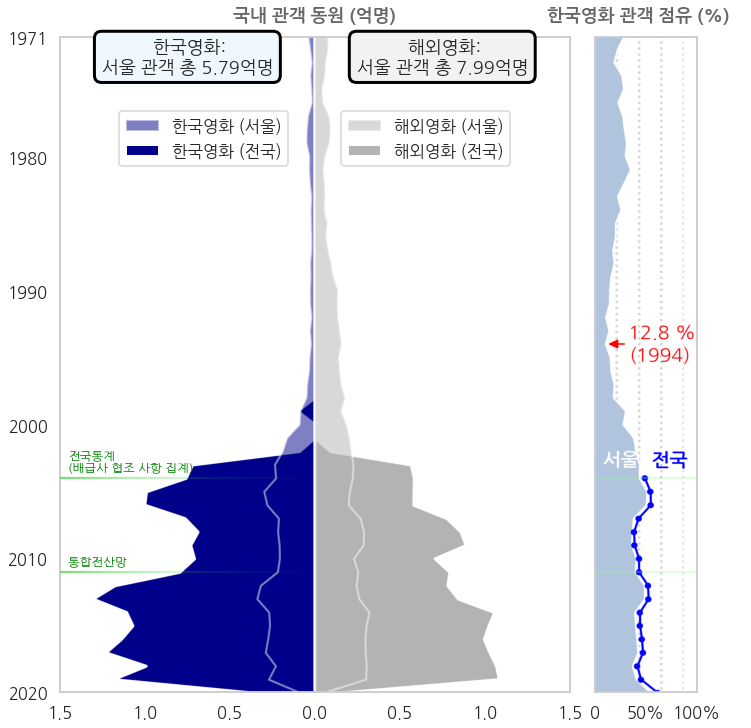

In [48]:
### 조립

# axs[0]
fig0_img = plt.imread("./images/bo_year0.png")
fig0_img = fig0_img.swapaxes(0, 1)[:,::-1, :][10:-10,10:-10,:]
x0, x1 = -1.5, 1.5
y1, y0 = 1971, 2020

axs[0].imshow(fig0_img, extent=[x0, x1, y0, y1])
axs[0].set_aspect(abs(x1-x0)/abs(y1-y0)*portion_aspect0*10/10)
axs[0].grid(False)
xticks = np.arange(-1.5, 2, 0.5)
axs[0].set_xticks(xticks)
axs[0].set_xticklabels(abs(xticks))

axs[0].text(-0.75, 1972.5, f" 한국영화:\n서울 관객 총 {df_boY_kr['서울 관객수'].sum()/1e8:0.2f}억명", ha="center", va="center",
            bbox={"boxstyle":"round", "pad":0.4, 
                  "facecolor":"aliceblue", "edgecolor":"k", "linewidth":3}, 
            zorder=20)

axs[0].text(0.75, 1972.5, f" 해외영화:\n서울 관객 총 {df_boY_nkr['서울 관객수'].sum()/1e8:0.2f}억명", ha="center", va="center",
            bbox={"boxstyle":"round", "pad":0.4, 
                  "facecolor":"0.95", "edgecolor":"k", "linewidth":3}, 
            zorder=20)

#legend
axs[0].bar(0, 1, fc=c_kr, lw=2, label="서울", alpha=0.5)
axs[0].bar(0, 1, fc=c_kr, lw=2, label="전국")
axs[0].bar(0, 1, fc=c_etc, lw=2, label="서울", alpha=0.5)
axs[0].bar(0, 1, fc=c_etc, lw=2, label="전국")

handles, labels = axs[0].get_legend_handles_labels()
legend_kr = axs[0].legend(handles=handles[:2], labels=["한국영화 (서울)", "한국영화 (전국)"],
                          loc="upper left", bbox_to_anchor=(0.1, 0.9))
legend_nkr = axs[0].legend(handles=handles[2:], labels=["해외영화 (서울)", "해외영화 (전국)"], 
                          loc="upper right", bbox_to_anchor=(0.9, 0.9))

axs[0].add_artist(legend_kr)


# axs[1]
fig1_img = plt.imread("./images/bo_year1.png")
fig1_img = fig1_img.swapaxes(0, 1)[:,::-1, :][10:-10,10:-10,:]
x0, x1 = 0, 1
y1, y0 = 1971, 2020

axs[1].imshow(fig1_img, extent=[x0, x1, y0, y1])
axs[1].set_aspect(abs(x1-x0)/abs(y1-y0)*portion_aspect1*10/10)
axs[1].grid(False)

# 전국통계
plot_history(2004, "전국통계\n(배급사 협조 사항 집계)", text_x_shift=0.05, text_fc='none', alpha_h1=0.3, text_align="left",
             ax=axs)

# 통합전산망
plot_history(2011, "통합전산망 ", text_x_shift=0.05, text_fc='none', alpha_h1=0.3,
             ax=axs)

display(fig)
fig.savefig("./images/bo_year.png", dpi=200)

## **3.3. 서울 관객 5천만, 전국 관객 1, 2억**

In [49]:
# 서울관객 5천만
seoul_50k_year = df_boY.loc[df_boY["서울 관객수"] > 5e7].iloc[0]["openYear"]
seoul_50k_num = df_boY.loc[df_boY["서울 관객수"] > 5e7].iloc[0]["서울 관객수"]

# 전국관객 1억
nation_100m_year = df_boY.loc[df_boY["전국 관객수"] > 1e8].iloc[0]["openYear"]
nation_100m_num = df_boY.loc[df_boY["전국 관객수"] > 1e8].iloc[0]["전국 관객수"]

# 전국관객 2억
nation_200m_year = df_boY.loc[df_boY["전국 관객수"] > 2e8].iloc[0]["openYear"]
nation_200m_num = df_boY.loc[df_boY["전국 관객수"] > 2e8].iloc[0]["전국 관객수"]

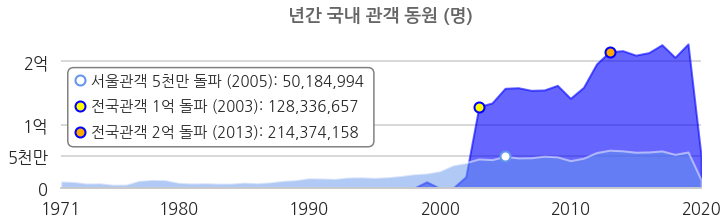

In [50]:
fig, ax = plt.subplots(figsize=(10, 3), constrained_layout=True)
ax.stackplot(df_boY["openYear"], df_boY["전국 관객수"], colors=["b"], ec="b", lw=2, alpha=0.6)
ax.stackplot(df_boY["openYear"], df_boY["서울 관객수"], colors=["cornflowerblue"], lw=2, alpha=0.5)
ax.set_xlim(1971, 2020)
ax.set_title("년간 국내 관객 동원 (명)", fontdict=font_title, pad=16)

xticks = [1971, 1980, 1990, 2000, 2010, 2020]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
yticks = [0, 50e6, 100e6, 200e6]
ax.set_yticks(yticks)
ax.set_yticklabels([0, "5천만", "1억", "2억"])

# Legend
ax.text(1972, 1.8e8, f"    서울관객 5천만 돌파 ({seoul_50k_year}): {format(seoul_50k_num, ',')} \n\n\n", 
        fontsize="small",
        bbox={"boxstyle":"round", "pad":0.4, "facecolor":"w", "edgecolor":"gray"}, ha="left", va="top")

ax.text(1972, 1.29e8, f"    전국관객 1억 돌파 ({nation_100m_year}): {format(nation_100m_num, ',')}", 
        fontsize="small", ha="left", va="center")
ax.text(1972, 0.88e8, f"    전국관객 2억 돌파 ({nation_200m_year}): {format(nation_200m_num, ',')}", 
        fontsize="small", ha="left", va="center")

# 서울관객 5천만
ax.scatter(seoul_50k_year, seoul_50k_num, 
           s=100, ec="cornflowerblue", lw=2, c="w", zorder=10)
ax.scatter(1972.5, 1.7e8, 
           s=100, ec="cornflowerblue", lw=2, c="w", zorder=10)

# 전국관객 1억
ax.scatter(nation_100m_year, nation_100m_num, 
           s=100, ec="blue", lw=2, c="#FFFF00", zorder=10)
ax.scatter(1972.5, 1.29e8, 
           s=100, ec="blue", lw=2, c="#FFFF00", zorder=10)
ax.scatter(nation_200m_year, nation_200m_num, 
           s=100, ec="blue", lw=2, c="#FFAA00", zorder=10)
ax.scatter(1972.5, 0.88e8, 
           s=100, ec="blue", lw=2, c="#FFAA00", zorder=10)


ax.spines[["left", "top", "right"]].set_visible(False)
ax.grid(axis="x")

fig.savefig("./images/bo_year_record.png", dpi=200)

## **3.3. 영화 편당 관객 수**

In [51]:
df_boY_kr.query('1971 <= openYear <= 1987')['서울 관객수']

0     3913867
1     2845083
2     1856398
3     2695969
4     2129130
5     1781146
6     4028277
7     4732529
8     4940554
9     3298231
10    3445652
11    2987014
12    2137983
13    2475661
14    2335820
15    2112474
16    2102287
Name: 서울 관객수, dtype: int64

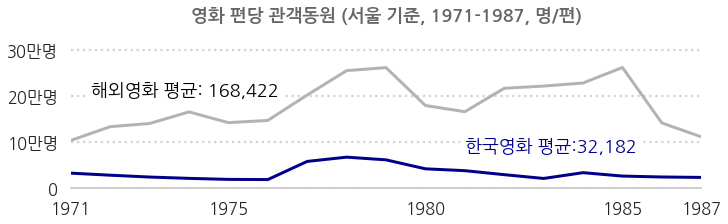

In [52]:
## 1971-1987
# 한국영화 1편당 관객 수
num_per_movie_kr = df_boY_kr.query("1971 <= openYear <= 1987")["서울 관객수"]/df_nationsY.query("1971 <= openYear <= 1987")["N_한국"]
mean_kr = format(int(df_boY_kr.query('1971 <= openYear <= 1987')['서울 관객수'].sum()/df_nationsY.query('1971 <= openYear <= 1987')['N_한국'].sum()), ',')

# 해외영화 1편당 관객 수
num_per_movie_nkr = df_boY_nkr.query("1971 <= openYear <= 1987")["서울 관객수"]/df_nationsY.query("1971 <= openYear <= 1987")["해외"]
mean_nkr = format(int(df_boY_nkr.query('1971 <= openYear <= 1987')['서울 관객수'].sum()/df_nationsY.query('1971 <= openYear <= 1987')['해외'].sum()), ',')

fig, ax = plt.subplots(figsize=(10, 3), constrained_layout=True)
ax.plot(range(1971, 1988), num_per_movie_nkr, c=c_etc, lw=3)
ax.plot(range(1971, 1988), num_per_movie_kr, c=c_kr, lw=3)

xticks = [1971, 1975, 1980, 1985, 1987]
ax.set_xticks(xticks)
ax.set_xlim(1971, 1987)
ax.set_ylim(0, 3.5e5)
yticks = [0, 1e5, 2e5, 3e5]
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y/1e4:.0f}만명" if y > 0 else "0" for y in yticks])
for y in yticks:
    ax.axhline(y, c="lightgray", zorder=-1, ls=":")
ax.grid(False)
ax.spines[["left", "top", "right"]].set_visible(False)
# ax.legend(ncol=2, loc="lower right", bbox_to_anchor=(1, 0.8))

ax.text(1971.5, 2e5, f"해외영화 평균: {mean_nkr}", c="k", 
        bbox={"fc":"w"})
ax.text(1981, 8e4, f"한국영화 평균:{mean_kr}", c=c_kr, 
        bbox={"fc":"w"})
ax.set_title("영화 편당 관객동원 (서울 기준, 1971-1987, 명/편)", fontdict=font_title)
fig.savefig("./images/num_movie_mean_1971.png", dpi=200)

In [53]:
168422/32182

5.2334224100428814

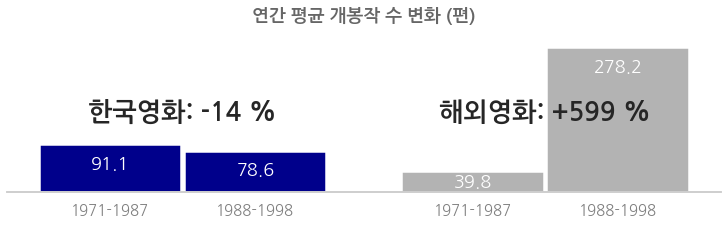

In [54]:
## 1988-1998

num_kr_1971 = df_nationsY.query("1971 <= openYear <= 1987")["N_한국"]
num_nkr_1971 = df_nationsY.query("1971 <= openYear <= 1987")["해외"]

num_kr_1988 = df_nationsY.query("1988 <= openYear <= 1998")["N_한국"]
num_nkr_1988 = df_nationsY.query("1988 <= openYear <= 1998")["해외"]

fig, ax = plt.subplots(figsize=(10, 3), constrained_layout=True)
ax.bar([-0.2, 0.2], [num_kr_1971.mean(), num_kr_1988.mean()], width=0.39, color=c_kr)
ax.bar([0.8, 1.2], [num_nkr_1971.mean(), num_nkr_1988.mean()], width=0.39, color=c_etc)
xticks = [0, 1]
ax.set_xticks(xticks)
ax.set_xticklabels([])
ax.set_title("연간 평균 개봉작 수 변화 (편)", fontdict=font_title, pad=16)
ax.spines[["left", "top", "right"]].set_visible(False)
ax.grid(False)
ax.set_yticks([])

ax.text(-0.2,-20, "1971-1987", ha="center", va="top", 
        fontsize="small", c="gray", transform=ax.transData)
ax.text(0.2,-20, "1988-1998", ha="center", va="top", 
        fontsize="small", c="gray", transform=ax.transData)


ax.text(0.8,-20, "1971-1987", ha="center", va="top", 
        fontsize="small", c="gray", transform=ax.transData)
ax.text(1.2,-20, "1988-1998", ha="center", va="top", 
        fontsize="small", c="gray", transform=ax.transData)


ax.text(-0.2, num_kr_1971.mean()-20, f"{num_kr_1971.mean():.1f}", 
        ha="center", va="top", c="w")
ax.text(0.2, num_kr_1988.mean()-20, f"{num_kr_1988.mean():.1f}", 
        ha="center", va="top", c="w")

ax.text(0.8, num_nkr_1971.mean()-5, f"{num_nkr_1971.mean():.1f}", 
        ha="center", va="top", c="w")
ax.text(1.2, num_nkr_1988.mean()-20, f"{num_nkr_1988.mean():.1f}", 
        ha="center", va="top", c="w")

ax.text(0, 140, 
        f"한국영화: {num_kr_1988.mean()/num_kr_1971.mean()*100 - 100:.0f} %", 
        fontsize="x-large", fontweight="bold", ha="center")

ax.text(1, 140, 
        f"해외영화: +{num_nkr_1988.mean()/num_nkr_1971.mean()*100 - 100:.0f} %", 
        fontsize="x-large", fontweight="bold", ha="center")

ax.set_ylim(0, 300)
fig.savefig("./images/num_change_1988.png", dpi=200)

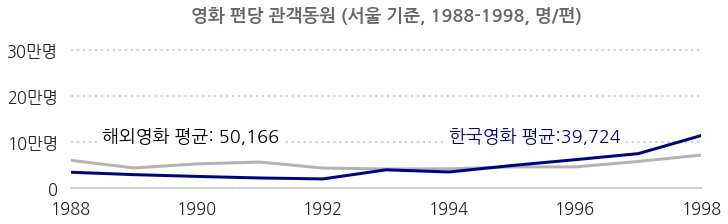

In [55]:
## 1988-1998

year0 = 1988
year1 = 1998

# 한국영화 1편당 관객 수
num_per_movie_kr = df_boY_kr.query(f"{year0} <= openYear <= {year1}")["서울 관객수"]/df_nationsY.query(f"{year0} <= openYear <= {year1}")["N_한국"]
mean_kr = format(int(df_boY_kr.query(f'{year0} <= openYear <= {year1}')['서울 관객수'].sum()/df_nationsY.query(f'{year0} <= openYear <= {year1}')['N_한국'].sum()), ',')

# 해외영화 1편당 관객 수
num_per_movie_nkr = df_boY_nkr.query(f"{year0} <= openYear <= {year1}")["서울 관객수"]/df_nationsY.query(f"{year0} <= openYear <= {year1}")["해외"]
mean_nkr = format(int(df_boY_nkr.query(f'{year0} <= openYear <= {year1}')['서울 관객수'].sum()/df_nationsY.query(f'{year0} <= openYear <= {year1}')['해외'].sum()), ',')

fig, ax = plt.subplots(figsize=(10, 3), constrained_layout=True)
ax.plot(range(year0, year1+1), num_per_movie_nkr, c=c_etc, lw=3)
ax.plot(range(year0, year1+1), num_per_movie_kr, c=c_kr, lw=3)

# xticks = [1971, 1975, 1980, 1985, 1987]
# ax.set_xticks(xticks)
ax.set_xlim(year0, year1)
ax.set_ylim(0, 3.5e5)
yticks = [0, 1e5, 2e5, 3e5]
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y/1e4:.0f}만명" if y > 0 else "0" for y in yticks])
for y in yticks:
    ax.axhline(y, c="lightgray", zorder=-1, ls=":")
ax.grid(False)
ax.spines[["left", "top", "right"]].set_visible(False)
# ax.legend(ncol=2, loc="lower right", bbox_to_anchor=(1, 0.8))

ax.text(year0 +0.5, 1e5, f"해외영화 평균: {mean_nkr}", c="k", 
        bbox={"fc":"w"})
ax.text(year1-4, 1e5, f"한국영화 평균:{mean_kr}", c=c_kr, 
        bbox={"fc":"w"})
ax.set_title(f"영화 편당 관객동원 (서울 기준, {year0}-{year1}, 명/편)", fontdict=font_title)
fig.savefig(f"./images/num_movie_mean_{year0}.png", dpi=200)

In [56]:
50166/39724

1.262863759943611

In [97]:
# 한국영화 1편당 관객 수 (1988-1992)
year0, year1 = 1988, 1992
num_per_movie_kr = df_boY_kr.query(f"{year0} <= openYear <= {year1}")["서울 관객수"]/df_nationsY.query(f"{year0} <= openYear <= {year1}")["N_한국"]
mean_kr = format(int(df_boY_kr.query(f'{year0} <= openYear <= {year1}')['서울 관객수'].sum()/df_nationsY.query(f'{year0} <= openYear <= {year1}')['N_한국'].sum()), ',')
print(mean_kr)

25,981


In [100]:
# 한국영화 1편당 관객 수 (1993-1995)
year0, year1 = 1993, 1995
num_per_movie_kr = df_boY_kr.query(f"{year0} <= openYear <= {year1}")["서울 관객수"]/df_nationsY.query(f"{year0} <= openYear <= {year1}")["N_한국"]
mean_kr = format(int(df_boY_kr.query(f'{year0} <= openYear <= {year1}')['서울 관객수'].sum()/df_nationsY.query(f'{year0} <= openYear <= {year1}')['N_한국'].sum()), ',')
print(mean_kr)

41,515


In [101]:
# 한국영화 1편당 관객 수 (1988-1995)
year0, year1 = 1988, 1995
num_per_movie_kr = df_boY_kr.query(f"{year0} <= openYear <= {year1}")["서울 관객수"]/df_nationsY.query(f"{year0} <= openYear <= {year1}")["N_한국"]
mean_kr = format(int(df_boY_kr.query(f'{year0} <= openYear <= {year1}')['서울 관객수'].sum()/df_nationsY.query(f'{year0} <= openYear <= {year1}')['N_한국'].sum()), ',')
print(mean_kr)

30,419


In [102]:
# 한국영화 1편당 관객 수 (1996-1998)
year0, year1 = 1996, 1998
num_per_movie_kr = df_boY_kr.query(f"{year0} <= openYear <= {year1}")["서울 관객수"]/df_nationsY.query(f"{year0} <= openYear <= {year1}")["N_한국"]
mean_kr = format(int(df_boY_kr.query(f'{year0} <= openYear <= {year1}')['서울 관객수'].sum()/df_nationsY.query(f'{year0} <= openYear <= {year1}')['N_한국'].sum()), ',')
print(mean_kr)

81,360


## **3.4. 년도별 서울 관객 분포**

### **3.4.1. 시각화 코드**

In [259]:
def plot_boS_year(year0, year1, nation, xmax=None, annot_pos=0.8, legend=False):

    # 영화 편당 서울 관객 수 분포
    if nation == '해외':
        df_bo_distS = df_bo_genres.query("국적 != '한국'").groupby("openYear").agg(list)["서울 관객수"].reset_index()    
        if not xmax:
            xmax = df_bo.query(f"{year0} <= openYear <= {year1}").query(f"국적 != '한국'")["서울 관객수"].max()

    else:
        df_bo_distS = df_bo_genres.query(f"국적 == '{nation}'").groupby("openYear").agg(list)["서울 관객수"].reset_index()
        if not xmax:
            xmax = df_bo.query(f"{year0} <= openYear <= {year1}").query(f"국적 == '{nation}'")["서울 관객수"].max()


    # 국가별 색상
    c_nation = N_colors[nation]

    nrows = year1-year0+1
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(12, 0.7*nrows), 
                            sharex=True, sharey=True,
                            # gridspec_kw={"hspace":-0.5},
                            # gridspec_kw={"width_ratios":[3,1]},
                            constrained_layout=True)

    z=0
    for ax, year in zip(axes[:,0], range(year0, year1+1)):
        ax.grid(False)
        ax.set_yticks([0])
        ax.set_yticklabels([""])
        ax.text(0, 0, f"{year} ", transform=ax.transAxes, ha="right", va="bottom")
        ax.set_ylabel("")
        ax.set_zorder(z+10)
        ax.set_facecolor("none")
        ax.spines[["left", "top", "right"]].set_visible(False)

        list_bo_year_ = df_bo_distS.query(f"openYear == {year}")["서울 관객수"].values
        if len(list_bo_year_) == 0:
            continue

        list_bo_year = list_bo_year_[0]
        if len(list_bo_year) > 1:
            sns.kdeplot(list_bo_year, 
                        color=c_nation, ec="w", lw=2, cut=0, fill=True, ax=ax, alpha=1)
            ax.set_ylabel("")

        else:
            ax.plot(list_bo_year * 2, [ax.get_ybound()[1]/2] * 2, 
                         c=c_nation, lw=2, alpha=1)

    ax.set_xlim(0, xmax*1.05)
    ax.set_ylim(0, ) #ax.get_ybound()[1]*0.5)

    for ax, year in zip(axes[:,0], range(year0, year1+1)):
        list_bo_year_ = df_bo_distS.query(f"openYear == {year}")["서울 관객수"].values
        if len(list_bo_year_) == 0:
            continue

        list_bo_year = list_bo_year_[0]

        # 최다 관객
        max_num = np.max(list_bo_year)
        ymax = ax.get_ybound()[1]
        ax.plot([max_num]*2, [-0.3*ymax, 0.3*ymax], "ko-", lw=2, mfc="#FFFF00", mew=2)

        # 해외
        if nation == '해외':
            max_movieNm = df_bo.query(f"openYear == {year}").loc[df_bo["서울 관객수"]==max_num].loc[df_bo["국적"]!='한국']["영화명"].values[0]
        else:
            max_movieNm = df_bo.query(f"openYear == {year}").loc[df_bo["서울 관객수"]==max_num].loc[df_bo["국적"]==nation]["영화명"].values[0]

        if max_num > annot_pos*xmax:
            ax.text(max_num, 0.1*ymax, f"{max_movieNm} ({format(max_num, ',')})  ", 
                    ha="right", c="k", fontsize="small")
        else:
            ax.text(max_num, 0.1*ymax, f"  {max_movieNm} ({format(max_num, ',')})", 
                    ha="left", c="k", fontsize="small")
        ax.set_ylim(0, )

    xticks = [x for x in ax.get_xticks() if (ax.get_xbound()[0] <= x <= ax.get_xbound()[1])]
    ax.set_xticks(xticks)
    ax.set_xticklabels([f"{x/10000:.0f}만" if x>0 else "0" for x in xticks])

    ### 관객 수 분포
    for ax, year in zip(axes[:,1], range(year0, year1+1)):
        ax.set_facecolor("none")
        ax.spines[["left", "top", "right"]].set_visible(False)
        ax.grid(False)

        list_bo_year_ = df_bo_distS.query(f"openYear == {year}")["서울 관객수"].values
        if len(list_bo_year_) == 0:
            continue

        list_bo_year = list_bo_year_[0]
        if len(list_bo_year) > 1:
            ymax = ax.get_ybound()[1]
            list_bo_year = np.array(list_bo_year)
            ax.plot([list_bo_year.min(), np.quantile(list_bo_year, 0.1)], [0.25*ymax, 0.25*ymax], 
                    c="darkred", lw=3, solid_capstyle='butt', label="하위10% 이하", zorder=-1)
            ax.plot([np.quantile(list_bo_year, 0.1), np.median(list_bo_year)], [0.25*ymax, 0.25*ymax], 
                    c="r", lw=13, solid_capstyle='butt', label="하위10%-중간값")
            ax.plot([np.median(list_bo_year), np.quantile(list_bo_year, 0.9)], [0.25*ymax, 0.25*ymax], 
                    c="b", lw=13, solid_capstyle='butt', label="중간값-상위10%")
            ax.plot([np.quantile(list_bo_year, 0.9), list_bo_year.max()], [0.25*ymax, 0.25*ymax], 
                    c="darkblue", lw=3, solid_capstyle='butt', label="상위10% 이상", zorder=-1)
            ax.plot([np.median(list_bo_year), np.median(list_bo_year)], [0, 0.5*ymax], c="w", lw=1)


            ax.set_ylabel("")

        else:
            ax.plot(list_bo_year * 2, [ax.get_ybound()[1]/2] * 2, 
                         c=c_nation, lw=2, alpha=1)

    handles, labels = axes[0, 1].get_legend_handles_labels()

    if legend:
        fig.legend(handles=handles[:4], labels=labels[:4],
                loc="upper center", bbox_to_anchor=(0.5,0.87),
                fontsize="xx-small", ncol=4)
        suptitle = "년도별 관객분포 및 최다관객 작품 (서울관객 기준, 명)\n"
        fig.suptitle(suptitle, 
                fontweight="bold", color="0.4")
    else:
        pass
    
    fig.subplots_adjust(hspace=-0.5, wspace=0.05) 
    fig.savefig(f"./images/bo_year_{year0}-{year1}_{nation}.png", dpi=200)


### **3.4.2. 한국영화**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:126: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


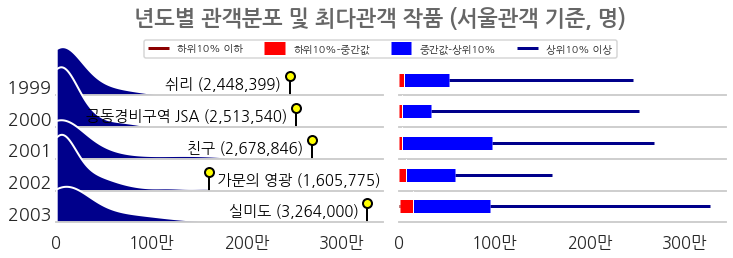

In [257]:
plot_boS_year(1999, 2003, '한국', annot_pos=0.65, legend=True) #, xmax=1.1e7)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:126: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


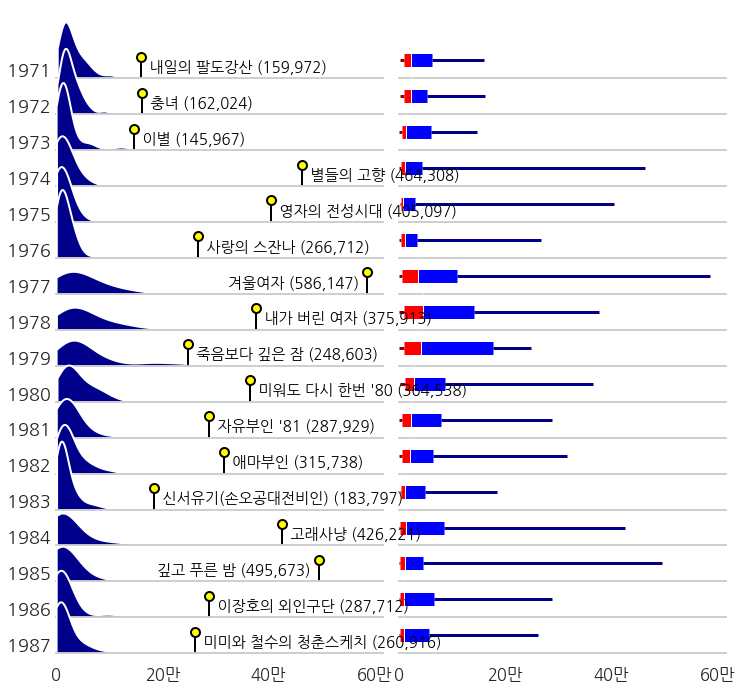

In [263]:
plot_boS_year(1971, 1987, '한국', annot_pos=0.8) #, xmax=1.1e7)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


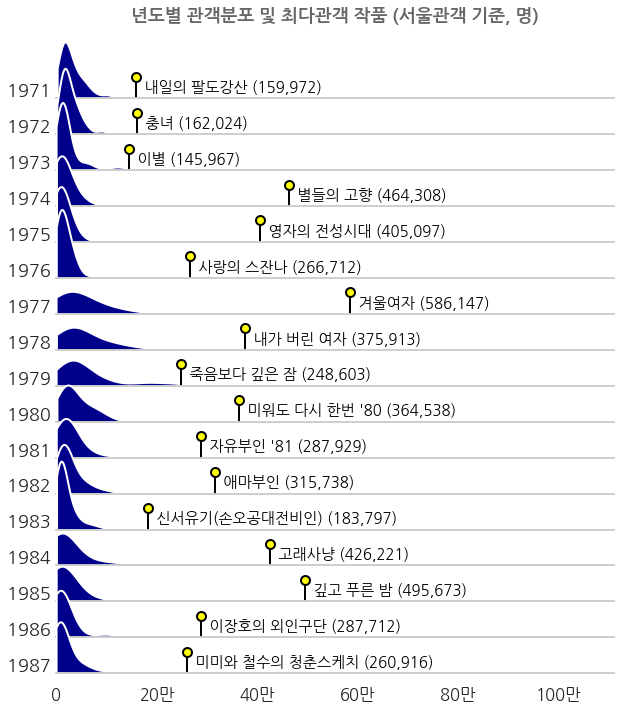

In [138]:
plot_boS_year(1971, 1987, '한국', annot_pos=0.7, xmax=1.1e6)

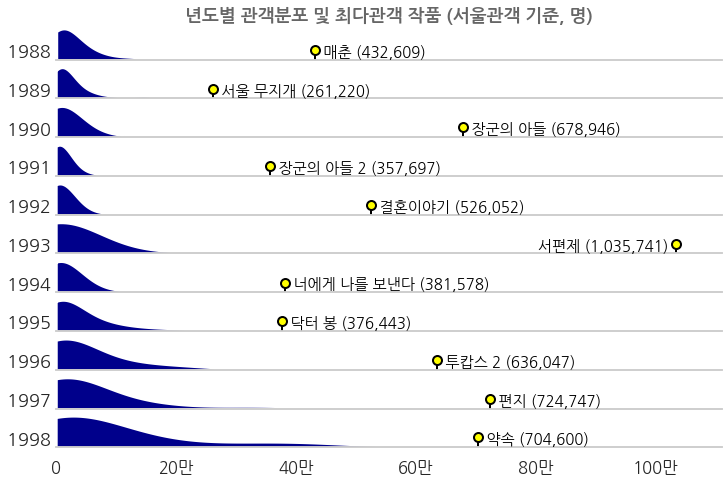

In [109]:
plot_boS_year(1988, 1998, '한국', xmax=1.1e6)

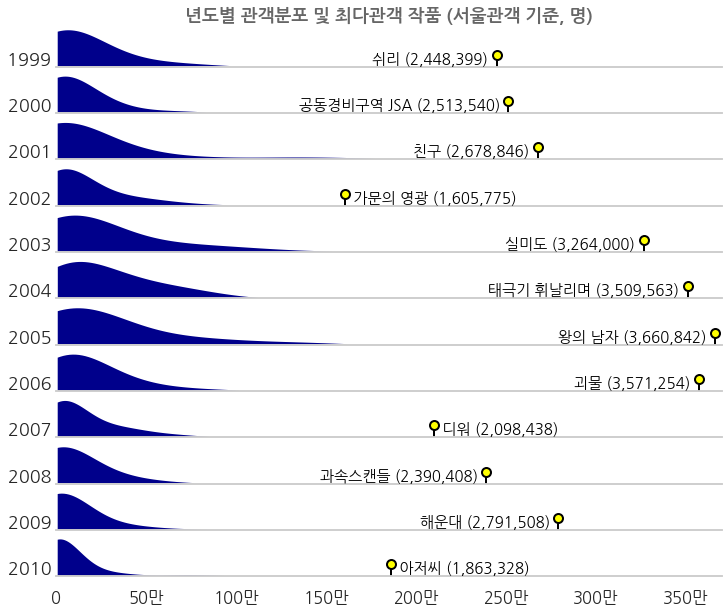

In [61]:
plot_boS_year(1999, 2010, '한국', annot_pos=0.6)

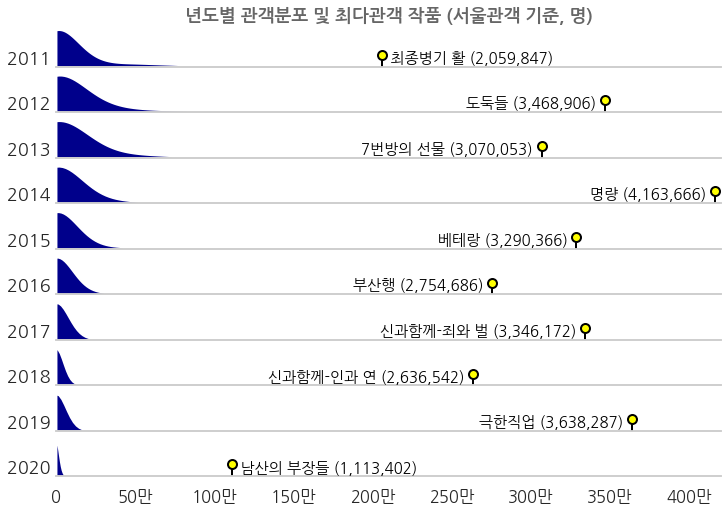

In [62]:
plot_boS_year(2011, 2020, '한국', annot_pos=0.6)

### **3.4.3. 해외영화**

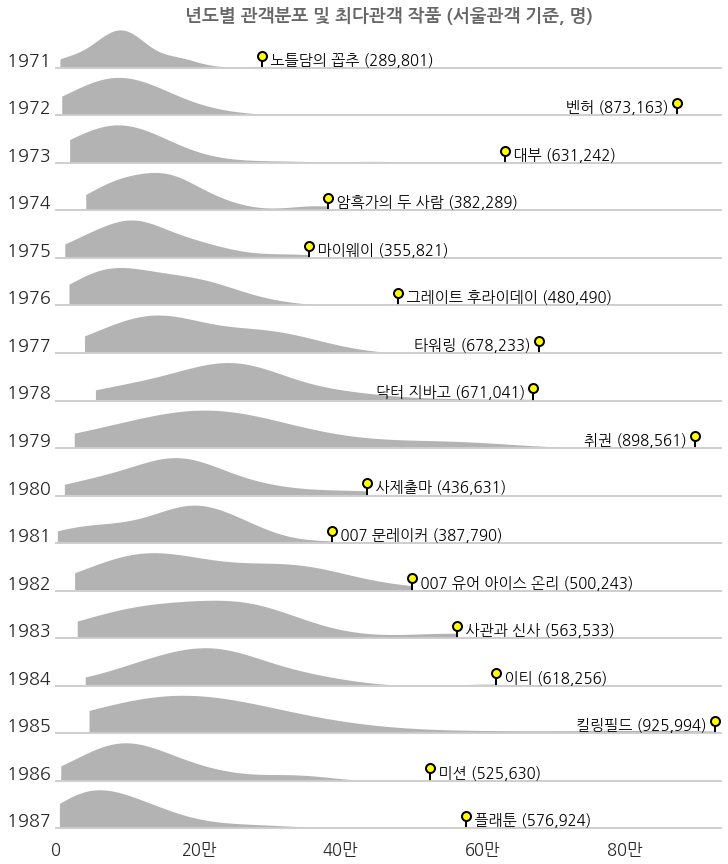

In [63]:
plot_boS_year(1971, 1987, '해외', annot_pos=0.7)

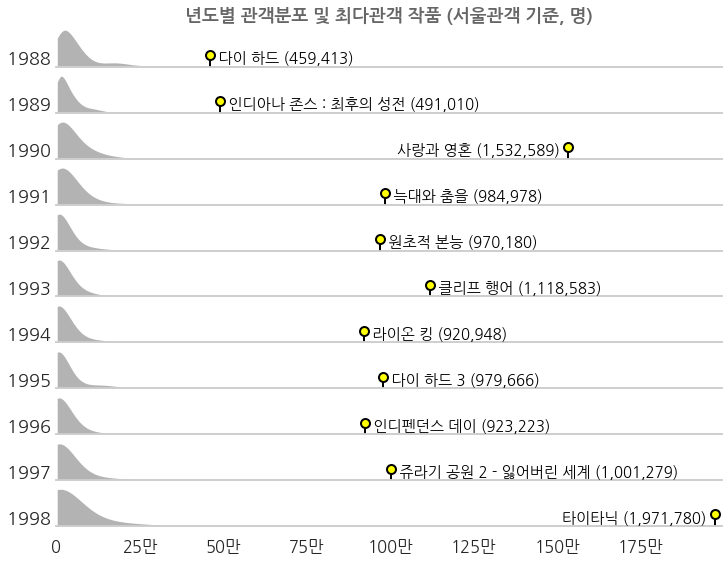

In [64]:
plot_boS_year(1988, 1998, '해외', annot_pos=0.6)

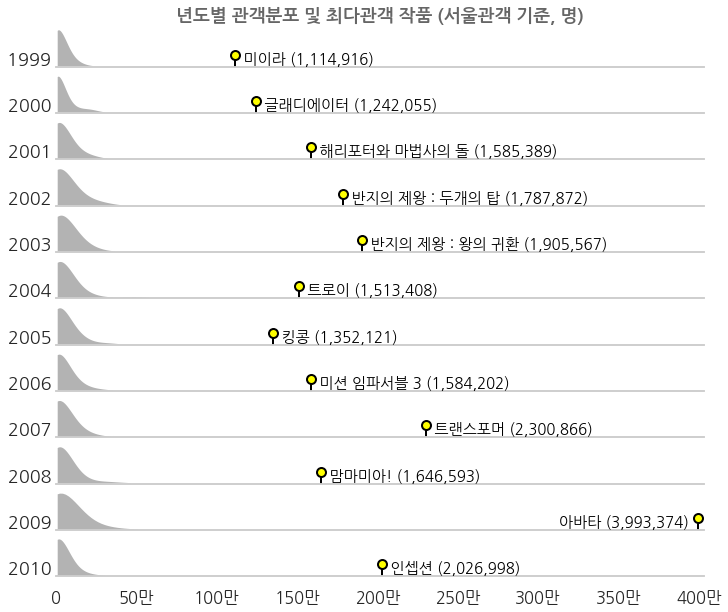

In [65]:
plot_boS_year(1999, 2010, '해외', annot_pos=0.75)

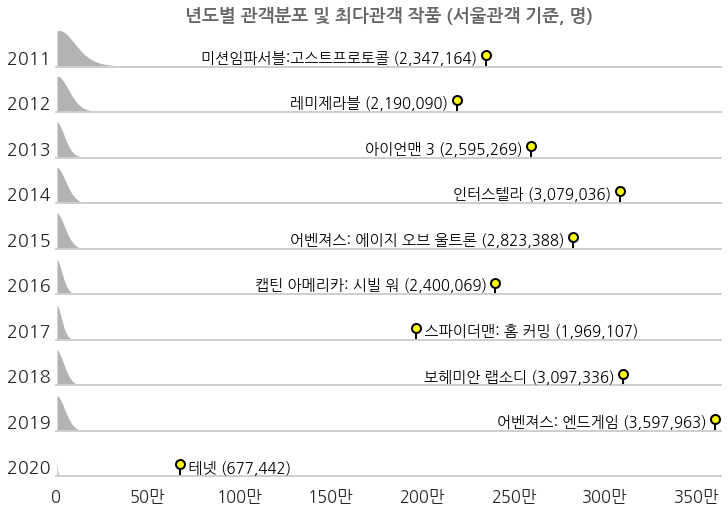

In [66]:
plot_boS_year(2011, 2020, '해외', annot_pos=0.6)

### **3.4.4. 미국영화**

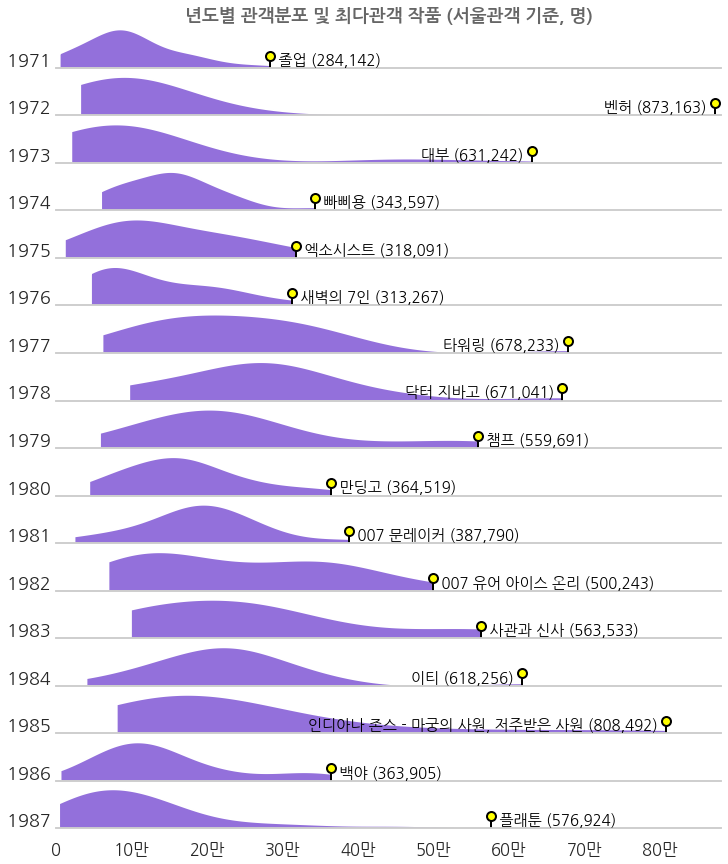

In [67]:
plot_boS_year(1971, 1987, '미국', annot_pos=0.7)

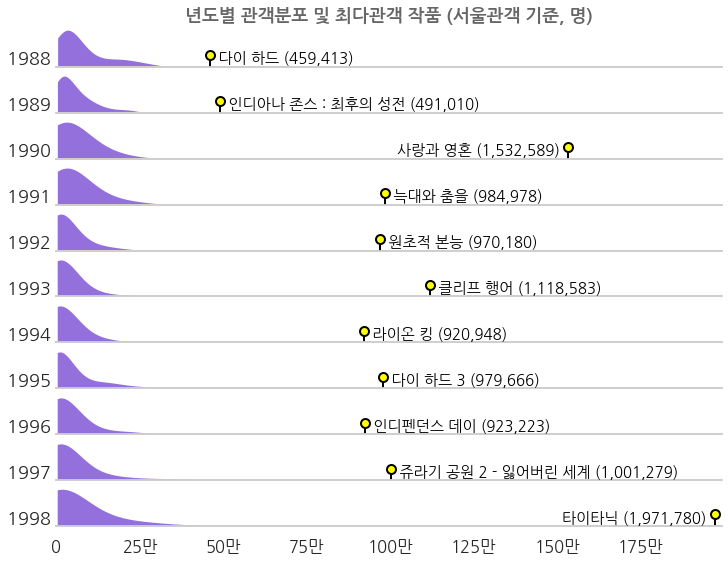

In [68]:
plot_boS_year(1988, 1998, '미국', annot_pos=0.7)

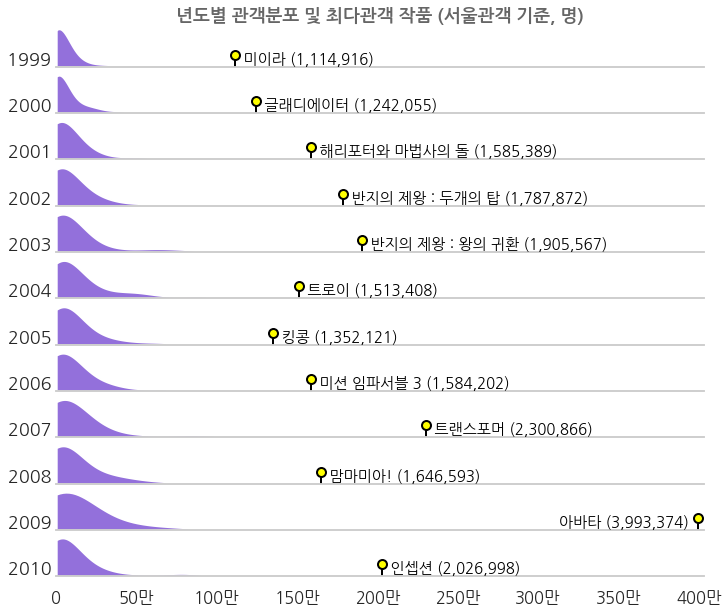

In [69]:
plot_boS_year(1999, 2010, '미국', annot_pos=0.7)

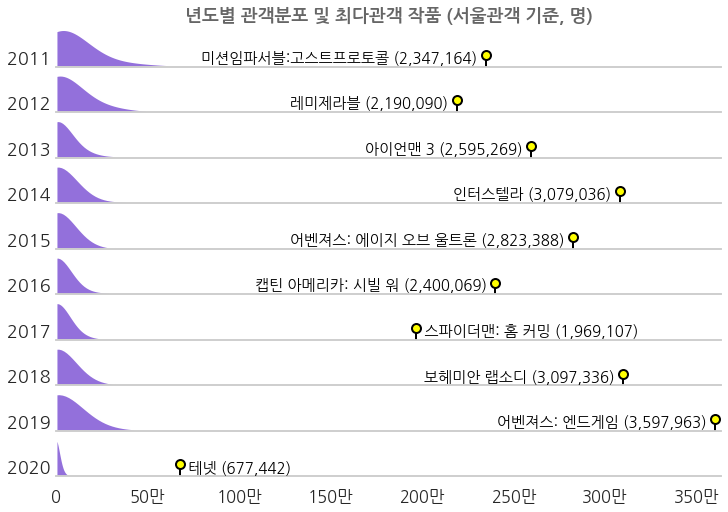

In [70]:
plot_boS_year(2011, 2020, '미국', annot_pos=0.6)

### **3.4.5. 일본영화**

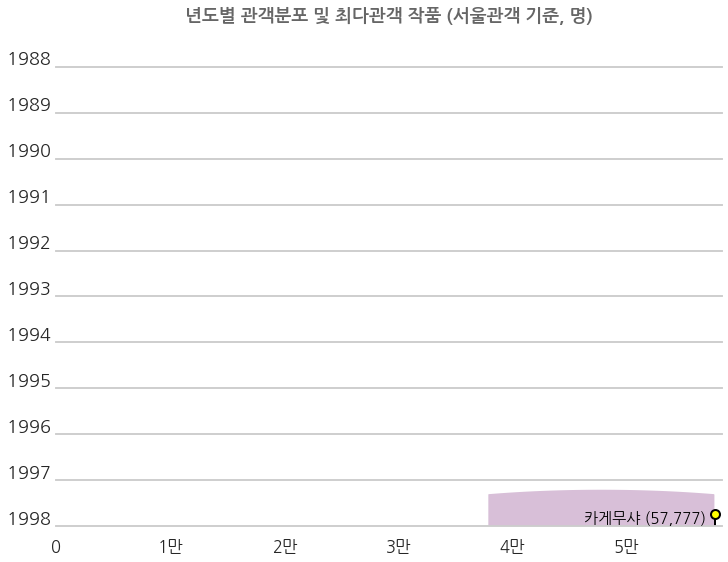

In [71]:
plot_boS_year(1988, 1998, '일본', annot_pos=0.7)

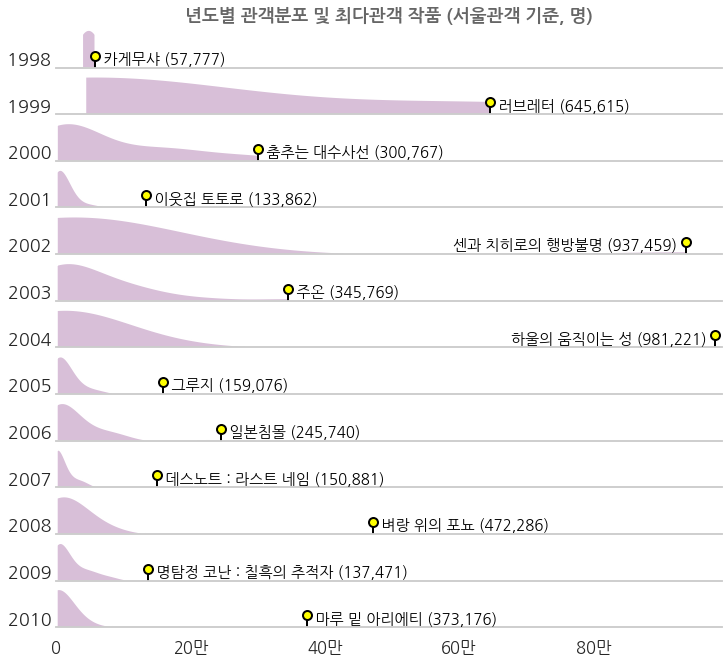

In [72]:
plot_boS_year(1998, 2010, '일본', annot_pos=0.9)

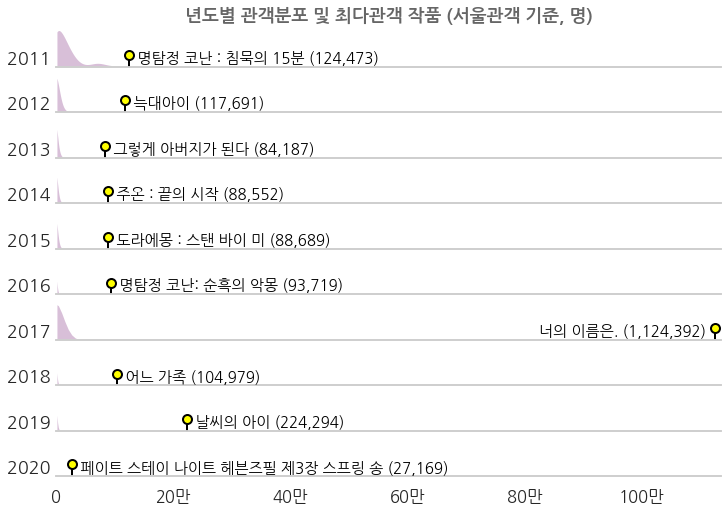

In [73]:
plot_boS_year(2011, 2020, '일본', annot_pos=0.7)

### **3.4.6. 홍콩영화**

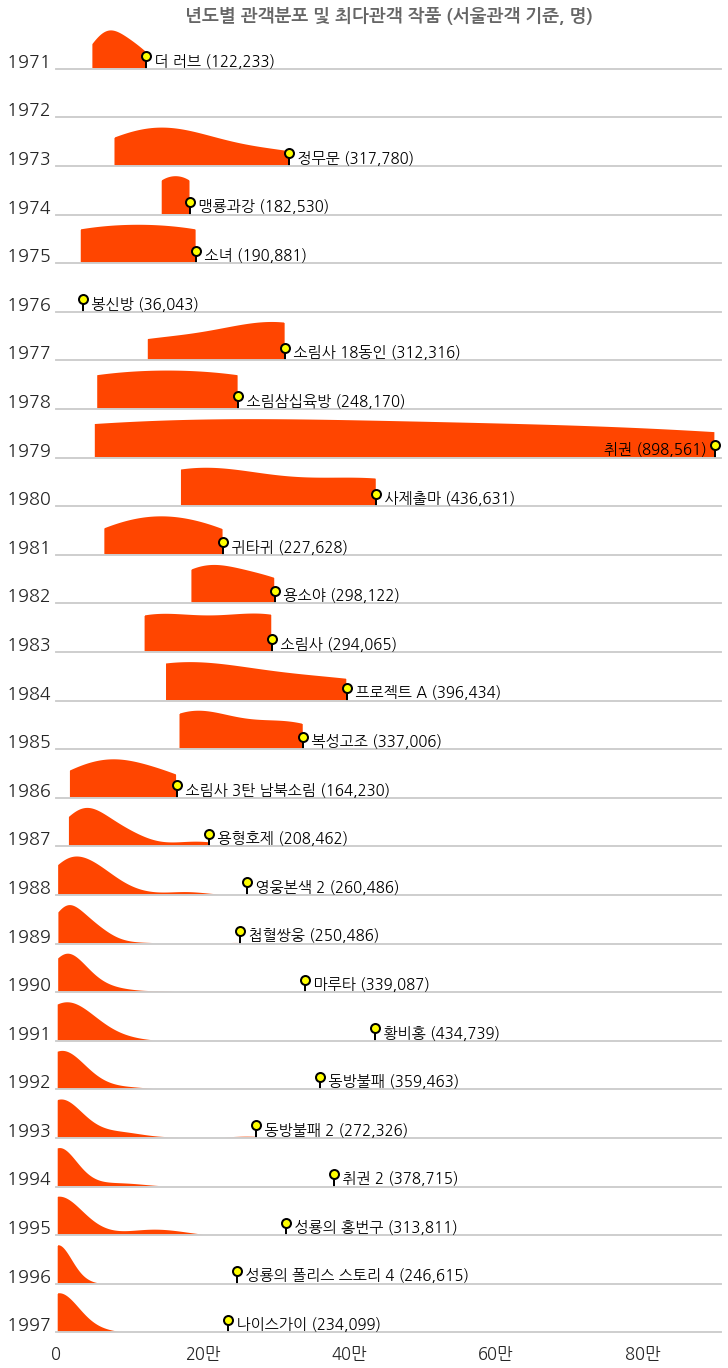

In [74]:
plot_boS_year(1971, 1997, '홍콩', annot_pos=0.7)

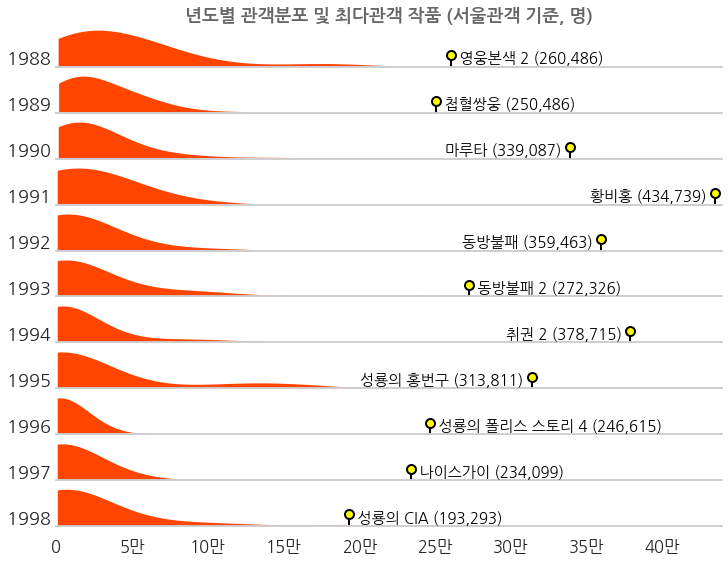

In [75]:
plot_boS_year(1988, 1998, '홍콩', annot_pos=0.7)

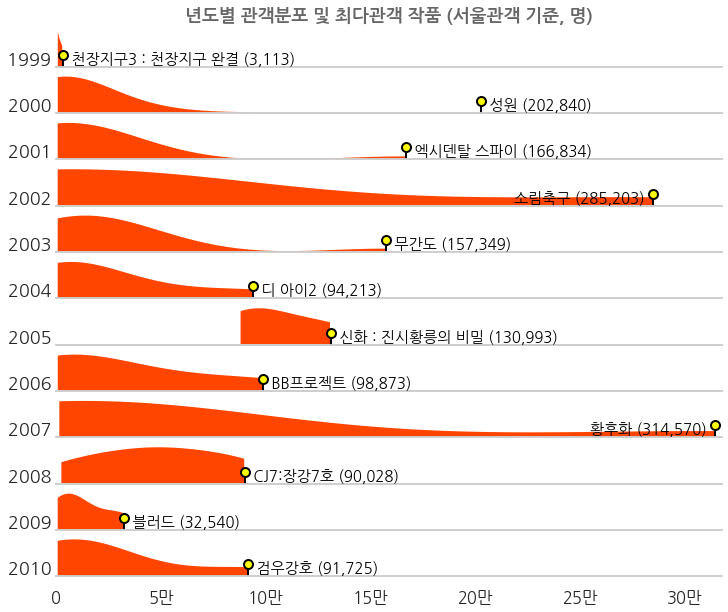

In [76]:
plot_boS_year(1999, 2010, '홍콩', annot_pos=0.7)

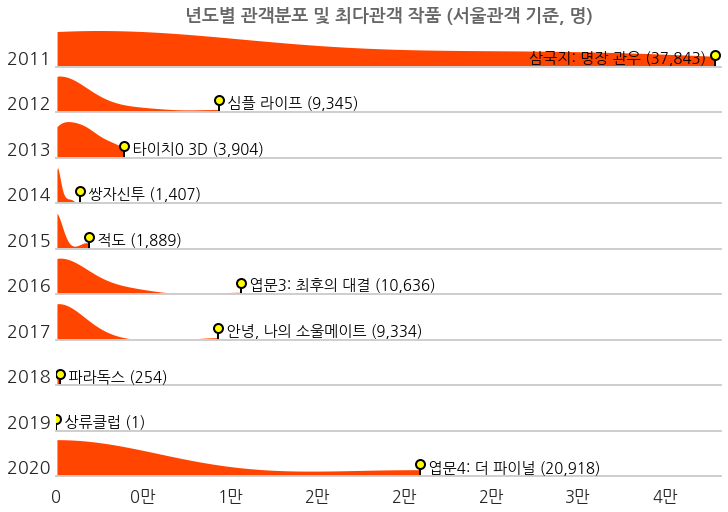

In [77]:
plot_boS_year(2011, 2020, '홍콩', annot_pos=0.7)

### **3.4.7. 프랑스영화**

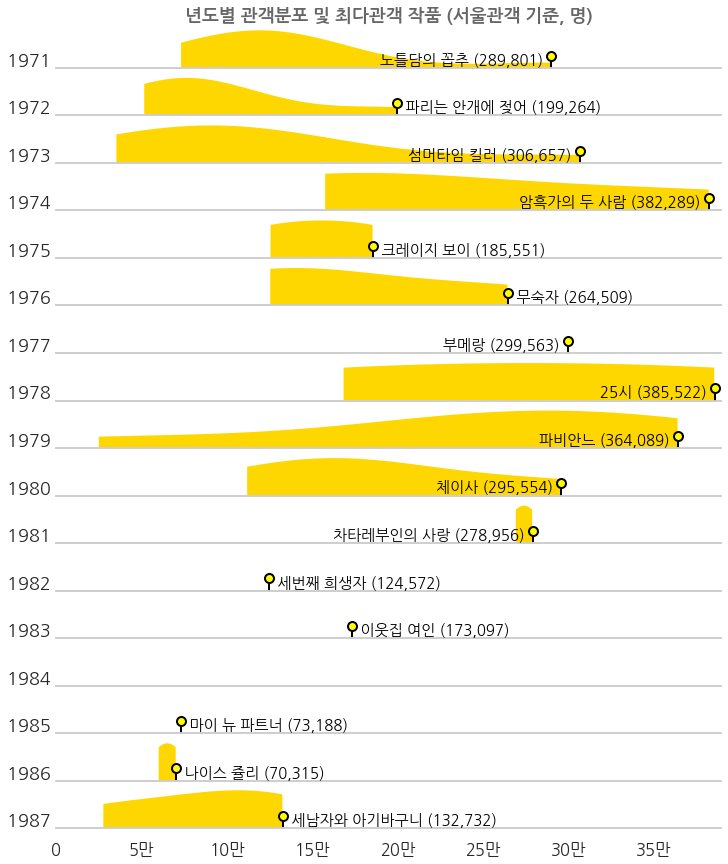

In [78]:
plot_boS_year(1971, 1987, '프랑스', annot_pos=0.7)

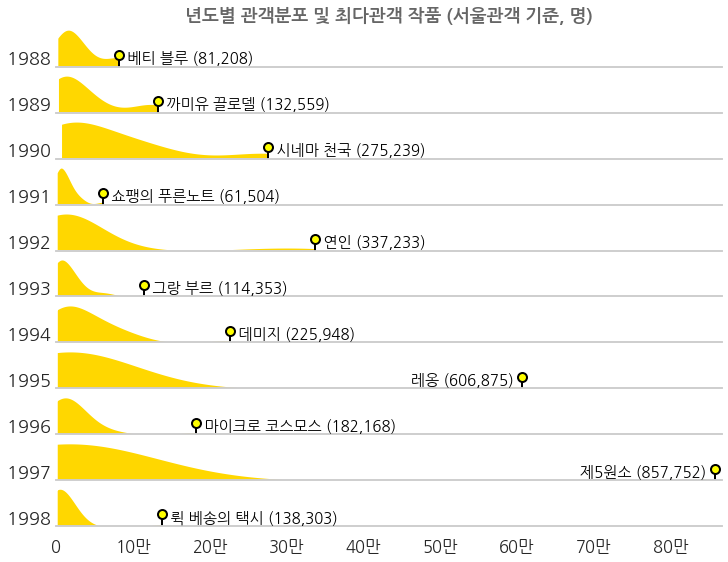

In [79]:
plot_boS_year(1988, 1998, '프랑스', annot_pos=0.7)

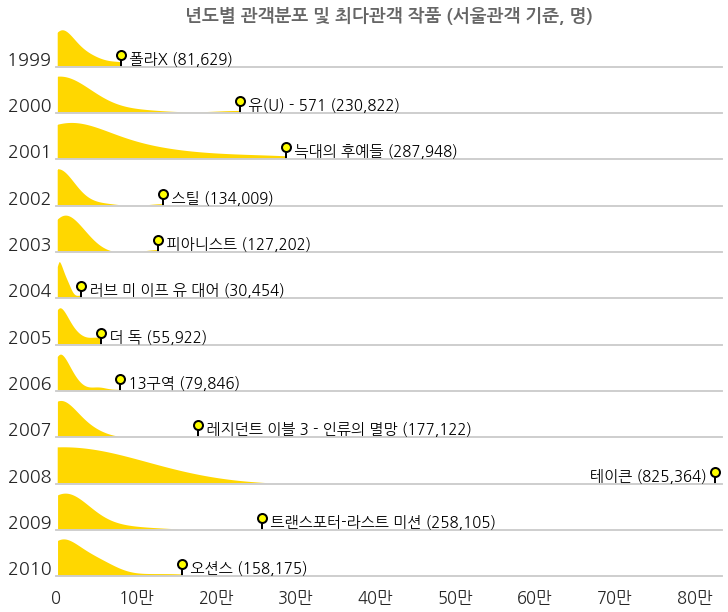

In [80]:
plot_boS_year(1999, 2010, '프랑스', annot_pos=0.7)

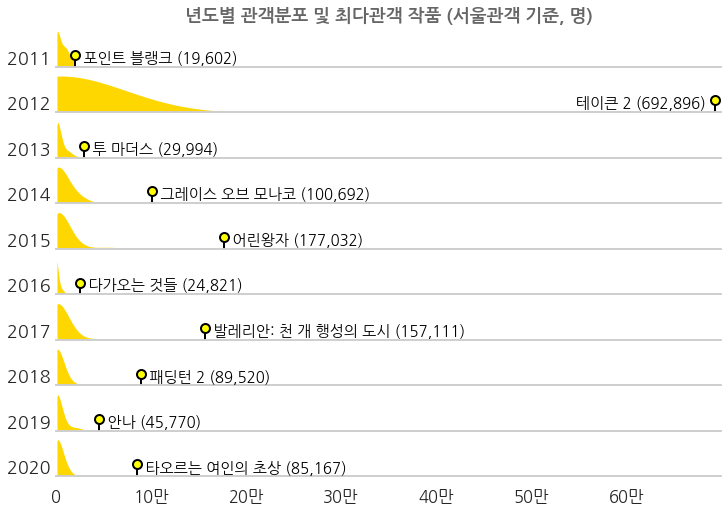

In [81]:
plot_boS_year(2011, 2020, '프랑스', annot_pos=0.7)

## **3.4. 코로나19 효과**

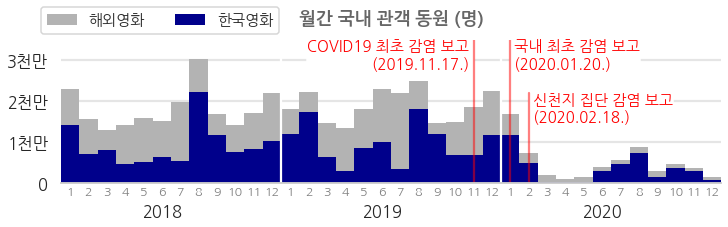

In [82]:
fig, ax = plt.subplots(figsize=(10, 3), constrained_layout=True)
ax.bar(df_boM["YearMonth"], df_boM["전체 관객수"], width=1, ec='none', 
       color=[c_etc]*36, label="해외영화")
ax.bar(df_boM["YearMonth"], df_boM["한국 관객수"], width=1, ec='none', 
       color=[c_kr]*36, label="한국영화")

for y in range(3):
    for m in range(12):
        ax.text(12*y + m, -1e6, f"{m+1}", fontsize="x-small", c="gray", ha="center", va="top")

ax.set_xlim(-0.5, 35.5)
ax.set_xticks([5, 17, 29])
ax.set_xticklabels([2018, 2019, 2020], va="top")
ax.tick_params(axis="x", pad=12)
ax.set_ylim(0, 3.5e7)
yticks=np.arange(0, 4e7, 1e7)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y/1e7:.0f}천만" if y > 0 else "0" for y in yticks])
ax.grid(False)

ax.set_title("월간 국내 관객 동원 (명)", fontdict=font_title, pad=16)
ax.spines[["left", "top", "right"]].set_visible(False)
for y in yticks:
    ax.axhline(y, c="gray", zorder=-1, alpha=0.2)
ax.axvline(11.5, c="w")
ax.axvline(23.5, c="w")

# 발병
ax.axvline(22, c="r", alpha=0.5)
ax.axvline(24, c="r", alpha=0.5)
ax.plot([25, 25], [0, 2.2e7], c="r", alpha=0.5)
ax.text(22, 2.8e7, "COVID19 최초 감염 보고 \n(2019.11.17.) ", ha="right", fontsize="small", c="r",
        bbox={"pad":0, "fc":"w"}, zorder=-0.5)
ax.text(24, 2.8e7, " 국내 최초 감염 보고\n (2020.01.20.)", ha="left", fontsize="small", c="r",
        bbox={"pad":0, "fc":"w"}, zorder=-0.5)
ax.text(25, 1.5e7, " 신천지 집단 감염 보고\n (2020.02.18.)", ha="left", fontsize="small", c="r",
        bbox={"pad":0, "fc":"w"}, zorder=-0.5)

fig.legend(loc="lower left", bbox_to_anchor=(0.04, 0.84), fontsize="small", ncol=2)
# ax.legend(loc="upper left", fontsize="small", ncol=2)

fig.savefig("./images/bo_covid19.png", dpi=200)

## **3.5. 쉬리 vs JSA**

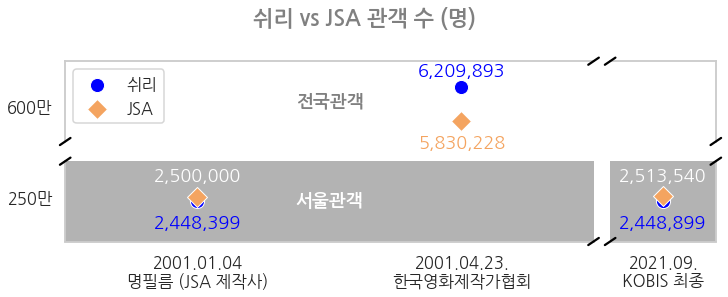

In [83]:
sj_x = ["2001.01.04\n명필름 (JSA 제작사)", "2001.04.23.\n한국영화제작가협회", "2021.09.\nKOBIS 최종"]
sj_s = [2.448399, 6.209893, 2.448899]
sj_j = [2.500000, 5.830228, 2.513540]

fig = plt.figure(figsize=(10, 4), constrained_layout=True)
axd = fig.subplot_mosaic(
    """
    AC
    BD
    """, 
gridspec_kw={"width_ratios":[2, 0.4], "wspace":0.01, "hspace":0.01})

#
c_s = "blue"
c_j = "sandybrown"
axd["A"].scatter(sj_x[:2], sj_s[:2], marker="o", s=200, c=c_s, ec="w", lw=1, label="쉬리")
axd["A"].scatter(sj_x[:2], sj_j[:2], marker="D", s=200, c=c_j, ec="w", lw=1, label="JSA")
axd["D"].scatter(sj_x[2], sj_s[2], marker="o", s=200, c=c_s, ec="w", lw=1)
axd["D"].scatter(sj_x[2], sj_j[2], marker="D", s=200, c=c_j, ec="w", lw=1)
axd["A"].set_xlim(-0.5, 1.5)
axd["A"].set_ylim(5.600000, 6.500000)
axd["C"].set_ylim(5.600000, 6.500000)
axd["A"].set_yticks([6])
axd["A"].set_yticklabels(["600만"])
axd["A"].set_xticks([])
axd["C"].set_yticks([])
axd["A"].grid(False)
axd["C"].grid(False)
axd["C"].set_xticks([])

axd["B"].scatter(sj_x[:2], sj_s[:2], marker="o", s=200, c=c_s, ec="w", lw=1)
axd["B"].scatter(sj_x[:2], sj_j[:2], marker="D", s=200, c=c_j, ec="w", lw=1)
axd["B"].set_yticks([2.5])
axd["B"].set_yticklabels(["250만"])
axd["B"].set_xlim(-0.5, 1.5)
axd["B"].set_ylim(2, 2.90000)
axd["D"].set_ylim(2, 2.90000)
axd["D"].set_yticks([])
axd["C"].set_xlim(-0.5, 0.5)
axd["D"].set_xlim(-0.5, 0.5)
axd["B"].grid(False)
axd["D"].grid(False)

axd["A"].spines[["bottom", "right"]].set_visible(False)
axd["B"].spines[["top", "right"]].set_visible(False)
axd["C"].spines[["bottom", "left"]].set_visible(False)
axd["D"].spines[["top", "left"]].set_visible(False)

axd["B"].set_facecolor("0.7")
axd["D"].set_facecolor("0.7")

    
fig.suptitle("쉬리 vs JSA 관객 수 (명)\n", fontweight="bold", color="gray")
axd["B"].text(sj_x[0], sj_s[0]-0.15, format(int(sj_s[0]*1e6), ","), va="top", ha="center", color=c_s)
axd["B"].text(sj_x[0], sj_s[0]+0.2, format(int(sj_j[0]*1e6), ","), va="bottom", ha="center", color="w")
axd["D"].text(sj_x[2], sj_s[2]-0.15, format(int(sj_s[2]*1e6), ","), va="top", ha="center", color=c_s)
axd["D"].text(sj_x[2], sj_s[2]+0.2, format(int(sj_j[2]*1e6), ","), va="bottom", ha="center", color="w")
axd["A"].text(sj_x[1], sj_s[1]+0.1, format(int(sj_s[1]*1e6), ","), va="bottom", ha="center", color=c_s)
axd["A"].text(sj_x[1], sj_j[1]-0.15, format(int(sj_j[1]*1e6), ","), va="top", ha="center", color=c_j)

def plot_slash(ax_key, x, y, dx=0.02, dy=0.04):
    kwargs = dict(color='k', clip_on=False)
    axd[ax_key].plot((x-dx, x+dx), (y-dy, y+dy), **kwargs, zorder=3) 
    return axd[ax_key]
plot_slash("A", axd["A"].get_xbound()[0], axd["A"].get_ybound()[0])
plot_slash("A", axd["A"].get_xbound()[1], axd["A"].get_ybound()[1])
plot_slash("B", axd["B"].get_xbound()[0], axd["B"].get_ybound()[1])
plot_slash("B", axd["B"].get_xbound()[1], axd["B"].get_ybound()[0])
plot_slash("C", axd["C"].get_xbound()[0], axd["C"].get_ybound()[1], dx=0.05)
plot_slash("C", axd["C"].get_xbound()[1], axd["C"].get_ybound()[0], dx=0.05)
plot_slash("D", axd["D"].get_xbound()[0], axd["D"].get_ybound()[0], dx=0.05)
plot_slash("D", axd["D"].get_xbound()[1], axd["D"].get_ybound()[1], dx=0.05)

axd["A"].text(0.5, 6, "전국관객", fontweight="bold", color="gray", ha="center")
axd["B"].text(0.5, 2.4, "서울관객", fontweight="bold", color="w", ha="center")

axd["A"].legend(loc="upper left")

fig.savefig("./images/swiri_jsa.png", dpi=200)

## **2.3. 전국 관객 수 추정 모델 구축**

In [84]:
# 머신러닝 모델링 데이터
df_ml = deepcopy(df_bo)

In [85]:
# 등급 정의
df_ml["등급"].unique()

array(['15세이상관람가', '12세이상관람가', '전체관람가', '12세관람가', '15세관람가', '청소년관람불가',
       '18세관람가', '15세 미만인 자는 관람할 수 없는 등급', '12세이상관람가,12세관람가',
       '15세관람가,15세이상관람가', nan, '청소년관람불가,15세이상관람가', '18세관람가,15세이상관람가',
       '18세관람가,청소년관람불가', '12세이상관람가,전체관람가', '12세이상관람가,15세이상관람가',
       '15세이상관람가,전체관람가', '제한상영가', '15세관람가,12세이상관람가', '고등학생이상관람가',
       '연소자관람불가', '모든 관람객이 관람할 수 있는 등급', '중학생이상관람가', '연소자관람가', '국민학생관람불가',
       '미성년자관람불가', '18세 미만인 자는 관람할 수 없는 등급', '12세이상관람가,연소자관람가',
       '연소자관람불가,15세이상관람가', '연소자관람가,15세이상관람가', '15세이상관람가,중학생이상관람가',
       '12세 미만인 자는 관람할 수 없는 등급', '15세 미만인 자는 관람할 수 없는 등급 ,15세이상관람가', '기타',
       '연소자관람불가,청소년관람불가', '연소자관람가,전체관람가',
       '15세이상관람가,18세 미만인 자는 관람할 수 없는 등급', '미정', '고등학생이상관람가,15세이상관람가',
       '15세이상관람가,미성년자관람불가', '미성년자관람가', '국민학생관람불가,15세이상관람가',
       '12세이상관람가,중학생이상관람가', '고등학생이상관람가,청소년관람불가',
       '12세이상관람가,국민학생관람불가,15세이상관람가', '12세이상관람가,국민학생관람불가',
       '12세이상관람가,연소자관람가,전체관람가', '청소년관람불가,12세관람가', '국민학생관람불가,중학생이상관람가',
       '국민학생관람불가,청소년관람불가', '청소년관람불가,

In [86]:
# 등급 정리
df_ml["등급"] = df_bo["등급"].map({"15세이상관람가":"15",
                                "12세이상관람가":"12",
                                "전체관람가":"A",
                                "12세관람가":"12",
                                "청소년관람불가":"18",
                                "18세관람가":"18",
                                "15세 미만인 자는 관람할 수 없는 등급":"15",
                                '12세이상관람가,12세관람가':"12",
                                '15세관람가,15세이상관람가':"15",
                                '청소년관람불가,15세이상관람가':"15",
                                '18세관람가,15세이상관람가':"15",
                                '18세관람가,청소년관람불가':"18", 
                                '12세이상관람가,전체관람가':"A", 
                                '12세이상관람가,15세이상관람가':"12",       
                                '15세이상관람가,전체관람가':"A", 
                                '제한상영가':"X", 
                                '15세관람가,12세이상관람가':"12", 
                                '고등학생이상관람가':"15",
                                '연소자관람불가':"18", 
                                '모든 관람객이 관람할 수 있는 등급':"A", 
                                '중학생이상관람가':"12", 
                                '연소자관람가':"A", 
                                '국민학생관람불가':"15",
                                '미성년자관람불가':"18", 
                                '18세 미만인 자는 관람할 수 없는 등급':"18", 
                                '12세이상관람가,연소자관람가':"A",
                                '연소자관람불가,15세이상관람가':"15", 
                                '연소자관람가,15세이상관람가':"A", 
                                '15세이상관람가,중학생이상관람가':"12",    
                                '12세 미만인 자는 관람할 수 없는 등급':"12", 
                                '15세 미만인 자는 관람할 수 없는 등급 ,15세이상관람가':"15", 
                                '연소자관람불가,청소년관람불가':"18", 
                                '연소자관람가,전체관람가':"A",
                                '15세이상관람가,18세 미만인 자는 관람할 수 없는 등급':"15", 
                                '고등학생이상관람가,15세이상관람가':"15",
                                '15세이상관람가,미성년자관람불가':"15", 
                                '미성년자관람가':"A", 
                                '국민학생관람불가,15세이상관람가':"12",
                                '12세이상관람가,중학생이상관람가':"12", 
                                '고등학생이상관람가,청소년관람불가':"15",
                                '12세이상관람가,국민학생관람불가,15세이상관람가':"12", 
                                '12세이상관람가,국민학생관람불가':"12",
                                '12세이상관람가,연소자관람가,전체관람가':"A", 
                                '청소년관람불가,12세관람가':"12", 
                                '국민학생관람불가,중학생이상관람가':"12",
                                '국민학생관람불가,청소년관람불가':"12", 
                                '청소년관람불가,전체관람가':"A", 
                                '모든 관람객이 관람할 수 있는 등급,전체관람가':"A",
                                '12세이상관람가,15세 미만인 자는 관람할 수 없는 등급':"12", 
                                '전체관람가,중학생이상관람가':"A",
                                '청소년관람불가,고등학생이상관람가':"15", 
                                '12세이상관람가,고등학생이상관람가':"12"
                                })

In [87]:
# 데이터 선별
df_ml = df_ml[["국적", "전국 스크린수", "전국 관객수", "서울 관객수", "장르", "등급", "openYear"]]

# 전국 관객수 10만 이상, 500만 이하
df_ml = df_ml.loc[df_ml["전국 관객수"] >= 100000].loc[df_ml["전국 관객수"] <= 5000000]

# 결측치 제거
df_ml = df_ml.dropna()

# 데이터 수
df_ml.shape

(2091, 7)

In [88]:
# y : 전국 관객수
y = df_ml["전국 관객수"]

# X: 나머지
X = df_ml.drop("전국 관객수", axis=1)

print(X.shape)

(2091, 6)


In [89]:
# XGBoost Pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


def model():  
    # categorical and numerical features
    cat_features = ["국적", "장르", "등급"]
    cat_transformer = OneHotEncoder(sparse=False, handle_unknown="ignore")
    
    num_features = ["전국 스크린수", "서울 관객수", "openYear"]
    num_transformer = 'passthrough'

    # 1. 인자 종류별 전처리 적용
    preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features), 
                                                   ("cat", cat_transformer, cat_features)])

    # 2. 전처리 후 XGBoost 적용
    model = Pipeline(steps=[("preprocessor", preprocessor), 
                            ("ml", LGBMRegressor(use_missing=False, random_state=2021))
                           ])
    
    return model

In [90]:
# 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

lgbm = model()
lgbm.fit(X_train, y_train)
y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

In [91]:
# 이미지 저장 디렉토리
!mkdir images

mkdir: cannot create directory ‘images’: File exists


100803.89538081748 228482.84562281627


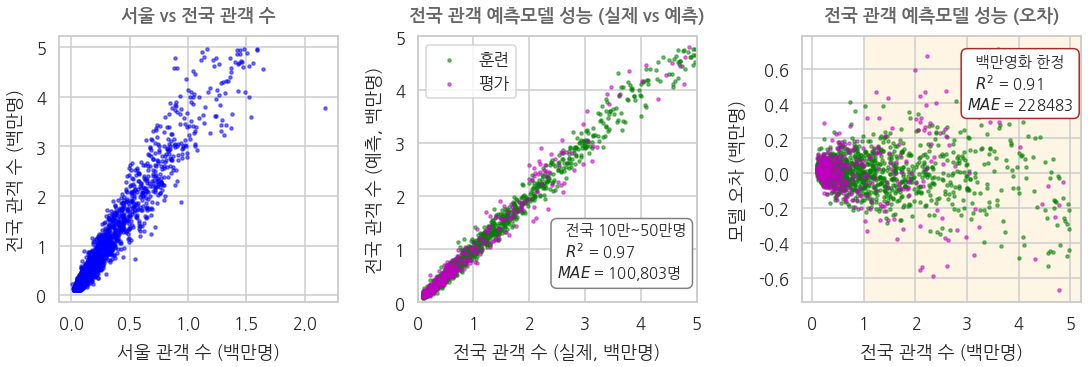

In [92]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# 전체데이터 예측성능
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# 백만영화 예측성능
r2_m = r2_score(y_test[y_test>1e6], y_test_pred[y_test>1e6])
mae_m = mean_absolute_error(y_test[y_test>1e6], y_test_pred[y_test>1e6])

fig, axs = plt.subplots(ncols=3, figsize=(15, 5), constrained_layout=True)
axs[0].scatter(df_ml["서울 관객수"]/1e6, y/1e6, s=10, alpha=0.5, c="b")
axs[1].scatter(y_train/1e6, y_train_pred/1e6, s=10, alpha=0.5, c="g", label="훈련")
axs[1].scatter(y_test/1e6, y_test_pred/1e6, s=10, alpha=0.5, c="m", label="평가")
axs[1].legend()
axs[2].scatter(y_train/1e6, (y_train_pred - y_train)/1e6, s=10, alpha=0.5, c="g")
axs[2].scatter(y_test/1e6, (y_test_pred - y_test)/1e6, s=10, alpha=0.5, c="m")

font_title = {"fontweight":"bold", "color":"0.4"}

axs[0].set_yticks([0, 1, 2, 3, 4, 5])
axs[0].set_xlabel("서울 관객 수 (백만명)", labelpad=12)
axs[0].set_ylabel("전국 관객 수 (백만명)", labelpad=12)
axs[0].set_title("서울 vs 전국 관객 수", fontdict=font_title, pad=16)

axs[1].set_xlim(0, 5)
axs[1].set_ylim(0, 5)
axs[1].set_xlabel("전국 관객 수 (실제, 백만명)", labelpad=12)
axs[1].set_ylabel("\n전국 관객 수 (예측, 백만명)", labelpad=12)
axs[1].set_yticks([0, 1, 2, 3, 4, 5])
axs[1].set_title("전국 관객 예측모델 성능 (실제 vs 예측)", fontdict=font_title, pad=16)

axs[2].axvspan(1, 5.2, fc="orange", zorder=-1, alpha=0.1)
axs[2].set_xlim(-0.2, 5.2)
axs[2].set_xticks([0, 1, 2, 3, 4, 5])
axs[2].set_ylabel("\n모델 오차 (백만명)", labelpad=12)
axs[2].set_xlabel("전국 관객 수 (백만명)", labelpad=12)
axs[2].set_title("전국 관객 예측모델 성능 (오차)", fontdict=font_title, pad=16)
axs[1].text(2.5, 1.5, "  전국 10만~50만명\n  $R^2$ = " + f"{r2:.2f}\n"+"$MAE$ = " + f"{format(int(mae),',')}명", fontsize="small", va="top", 
            bbox={"boxstyle":"round", "pad":0.4, "facecolor":"w", "edgecolor":"gray"})
axs[2].text(3, 0.68, "  백만영화 한정\n  $R^2$ = " + f"{r2_m:.2f}\n"+"$MAE$ = " + f"{mae_m:.0f}", fontsize="small", va="top", 
            bbox={"boxstyle":"round", "pad":0.4, "facecolor":"w", "edgecolor":"brown"})

fig.savefig("./images/ml.png", dpi=200)

print(mae, mae_m)

In [93]:
# 영화 데이터 보관 디렉토리
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [94]:
# API 활용 다운로드에 15분 가량 소요 (Colab 기준)
# 본인 google drive 등을 활용해 데이터 백업 권장.
df_movielist_raw = pd.read_pickle("./data/df_movielist_raw.pkl")

FileNotFoundError: ignored